# Model performance report for the EfficientNet-ResidualMLP training run on the night of 2021-12-15_2021_12_16 (run b)

### (Note the code for this run is the last commit. The code showing in this commit is ammended 
### for tonight's run.)

Hyperparameters:

## Model archirtecture:

Base model: Tandem EfficientNetB7 -> Residual Multi Layer Perceptron:

## EfficientNetB7 architecture:

1. Standard EfficientNetB7 with weights from ImageNet


## Residual Multi Layer Perceptron sub-model Architecture:

Each nested list is a residual block that chains together: 
(left side, input side, right side output side of the residual blocks pertion of the network):

```python
{
    [[5,150,10],[5,75,10],[5,75,10],[5,75,10],[5,75,10],[5,75,10]]
}
```

1. Explained:
    1. The integer on the 0th index is the number of layers in the block. 
    2. The integer on the 1st index is the number Dense layer neurons on the *first* layer of 
       the block.
    3. The integer in the 2nd index is a "subtractive decay factor". Each successive layer
       will have n fewer neurons than the last layer. If you want all layers the same,
       select 0 for this hyperparameter. You must exercise care not to call invalid permutations 
       of x[1] and x[2] (especially if you wite a script to recursively build models, 
       for example, neural architecture search applications). It is obvious we can't build 
       a model with a negatve number of neurons, and making x[2] too high, given x[0] 
       (number of layers) and x[1] (neurons in the first layer) will result in a negative 
       number for Dense units for some layers. This should throw an exception if this happens. 
       Monitor the logs of your training runs so as to detect any such issue.
    3. Each block will consist of the Dense layers that the architecture scripting algorithym 
       described above, in a sequential arrangement. The input of each block will split into 2 identical 
       tensors 'x' and 'y'.  The tensor 'x' is batch bormalized and fed through the block of Dense 
       layers. The tensor y is fed in parallel through a single batch normalization layer  
       and will bypass the block of Dense layers. At the end of the block, the 2 tensors x and y are 
       concatenated and will be batch normalized and passed to the downstream blocks / layers.
       
A general property of this residual MLP architecture is that it appears to typically allow 
about 7 X the total model complexity and up to ~ 30 X as deep of a network before it 
significantly overfits [or creates other problems that tend to be model complexity limiting factors] 
when compared to a sequential Multi Layer Perceptron. It also appears to allow great performance 
from much smaller training sets. In this model, all inputs to Dense layers (except the first)
were batch normalized. Relu actiation and GlorotNormal initialization was used for all Dense 
layers.

## Additional Hyperparameters:

optimizer: Adam - learning_rate .0007, clip_norm = 1.0

loss: CategoricalCrossentropy

Final 3 dense layers following the residual mlp blocks: (each followed by batch norm): 

100 units,35 units, 21 units 

56 epochs

Early stopping callback: monitor val_loss, patence 50 (basically run all 56, 
but use this callback to leverage "restore_best_weights" so if the 54th epoch persorms best,
it retunrs this as the final mode.)

Model training set:

5000 randomly selected ciphar10 training set images (1/10 of the usual training set).

In [ ]:
## Below is a sample of how to use the residualmlp package to byild a transfer learning model ...

In [ ]:
! pip3 install pandas
! pip3 install seaborn
! pip3 install matplotlib

     |█▎                              | 450 kB 23.6 MB/s eta 0:00:01

     |█▎                              | 450 kB 23.6 MB/s eta 0:00:01

     |███                             | 1.1 MB 23.6 MB/s eta 0:00:01

     |███                             | 1.1 MB 23.6 MB/s eta 0:00:01

     |█████▋                          | 2.0 MB 23.6 MB/s eta 0:00:01

     |█████▋                          | 2.0 MB 23.6 MB/s eta 0:00:01

     |██████████                      | 3.6 MB 23.6 MB/s eta 0:00:01

     |██████████                      | 3.6 MB 23.6 MB/s eta 0:00:01

     |█████████████▍                  | 4.8 MB 23.6 MB/s eta 0:00:01

     |█████████████▍                  | 4.8 MB 23.6 MB/s eta 0:00:01

     |████████████████▊               | 6.0 MB 23.6 MB/s eta 0:00:01

     |████████████████▊               | 6.0 MB 23.6 MB/s eta 0:00:01

     |████████████████████            | 7.2 MB 23.6 MB/s eta 0:00:01

     |████████████████████            | 7.2 MB 23.6 MB/s eta 0:00:01

     |███████████████████████▍        | 8.4 MB 23.6 MB/s eta 0:00:01

     |███████████████████████▍        | 8.4 MB 23.6 MB/s eta 0:00:01

     |██████████████████████████▎     | 9.5 MB 23.6 MB/s eta 0:00:01

     |██████████████████████████▎     | 9.5 MB 23.6 MB/s eta 0:00:01

     |██████████████████████████████▎ | 10.9 MB 23.6 MB/s eta 0:00:01

     |██████████████████████████████▎ | 10.9 MB 23.6 MB/s eta 0:00:01

     |████████████████████████████████| 11.5 MB 23.6 MB/s eta 0:00:01

     |████████████████████████████████| 11.5 MB 23.6 MB/s eta 0:00:01

     |████████████████████████████████| 11.5 MB 23.6 MB/s 


     |████████████████████████████████| 11.5 MB 23.6 MB/s 


You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


     |████████████████████████████████| 292 kB 24.1 MB/s 


     |████████████████████████████████| 292 kB 24.1 MB/s 


     |█▊                              | 614 kB 24.6 MB/s eta 0:00:01

     |█▊                              | 614 kB 24.6 MB/s eta 0:00:01

     |████▍                           | 1.5 MB 24.6 MB/s eta 0:00:01

     |████▍                           | 1.5 MB 24.6 MB/s eta 0:00:01

     |███████▍                        | 2.6 MB 24.6 MB/s eta 0:00:01

     |███████▍                        | 2.6 MB 24.6 MB/s eta 0:00:01

     |██████████████▏                 | 5.0 MB 24.6 MB/s eta 0:00:01

     |██████████████▏                 | 5.0 MB 24.6 MB/s eta 0:00:01

     |████████████████████████▎       | 8.6 MB 24.6 MB/s eta 0:00:01

     |████████████████████████▎       | 8.6 MB 24.6 MB/s eta 0:00:01

     |███████████████████████████▊    | 9.8 MB 24.6 MB/s eta 0:00:01

     |███████████████████████████▊    | 9.8 MB 24.6 MB/s eta 0:00:01

     |████████████████████████████████| 11.3 MB 24.6 MB/s eta 0:00:01

     |████████████████████████████████| 11.3 MB 24.6 MB/s eta 0:00:01

     |████████████████████████████████| 11.3 MB 24.6 MB/s 


     |████████████████████████████████| 11.3 MB 24.6 MB/s 


     |███████████████████████████████▌| 870 kB 26.9 MB/s eta 0:00:01

     |███████████████████████████████▌| 870 kB 26.9 MB/s eta 0:00:01

     |████████████████████████████████| 885 kB 26.9 MB/s 


     |████████████████████████████████| 885 kB 26.9 MB/s 


     |███████▋                        | 276 kB 30.3 MB/s eta 0:00:01

     |███████▋                        | 276 kB 30.3 MB/s eta 0:00:01

     |█████████████████████           | 768 kB 30.3 MB/s eta 0:00:01

     |█████████████████████           | 768 kB 30.3 MB/s eta 0:00:01

     |████████████████████████████████| 1.2 MB 30.3 MB/s 

     |████████████████████████████████| 1.2 MB 30.3 MB/s 

     |███████                         | 665 kB 28.6 MB/s eta 0:00:01

     |███████                         | 665 kB 28.6 MB/s eta 0:00:01

     |███████████████████▋            | 1.9 MB 28.6 MB/s eta 0:00:01

     |███████████████████▋            | 1.9 MB 28.6 MB/s eta 0:00:01

     |████████████████████████████████| 3.1 MB 28.6 MB/s eta 0:00:01

     |████████████████████████████████| 3.1 MB 28.6 MB/s eta 0:00:01

     |████████████████████████████████| 3.1 MB 28.6 MB/s 


     |████████████████████████████████| 3.1 MB 28.6 MB/s 


You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
# get our data

cifar = tf.keras.datasets.cifar10.load_data()
(x_train, y_train), (x_test, y_test) = cifar



    16384/170498071 [..............................] - ETA: 0s

    16384/170498071 [..............................] - ETA: 0s

   188416/170498071 [..............................] - ETA: 47s

   188416/170498071 [..............................] - ETA: 47s

   385024/170498071 [..............................] - ETA: 46s

   385024/170498071 [..............................] - ETA: 46s

   581632/170498071 [..............................] - ETA: 46s

   581632/170498071 [..............................] - ETA: 46s

   761856/170498071 [..............................] - ETA: 46s

   761856/170498071 [..............................] - ETA: 46s

   958464/170498071 [..............................] - ETA: 46s

   958464/170498071 [..............................] - ETA: 46s

  1155072/170498071 [..............................] - ETA: 46s

  1155072/170498071 [..............................] - ETA: 46s

  1351680/170498071 [..............................] - ETA: 46s

  1351680/170498071 [..............................] - ETA: 46s

  1548288/170498071 [..............................] - ETA: 45s

  1548288/170498071 [..............................] - ETA: 45s

  1744896/170498071 [..............................] - ETA: 45s

  1744896/170498071 [..............................] - ETA: 45s

  1941504/170498071 [..............................] - ETA: 45s

  1941504/170498071 [..............................] - ETA: 45s

  2138112/170498071 [..............................] - ETA: 45s

  2138112/170498071 [..............................] - ETA: 45s

  2334720/170498071 [..............................] - ETA: 45s

  2334720/170498071 [..............................] - ETA: 45s

  2531328/170498071 [..............................] - ETA: 45s

  2531328/170498071 [..............................] - ETA: 45s

  2727936/170498071 [..............................] - ETA: 45s

  2727936/170498071 [..............................] - ETA: 45s

  2924544/170498071 [..............................] - ETA: 45s

  2924544/170498071 [..............................] - ETA: 45s

  3121152/170498071 [..............................] - ETA: 45s

  3121152/170498071 [..............................] - ETA: 45s

  3301376/170498071 [..............................] - ETA: 45s

  3301376/170498071 [..............................] - ETA: 45s

  3497984/170498071 [..............................] - ETA: 45s

  3497984/170498071 [..............................] - ETA: 45s

  3678208/170498071 [..............................] - ETA: 45s

  3678208/170498071 [..............................] - ETA: 45s

  3874816/170498071 [..............................] - ETA: 45s

  3874816/170498071 [..............................] - ETA: 45s

  4071424/170498071 [..............................] - ETA: 45s

  4071424/170498071 [..............................] - ETA: 45s

  4268032/170498071 [..............................] - ETA: 44s

  4268032/170498071 [..............................] - ETA: 44s

  4464640/170498071 [..............................] - ETA: 44s

  4464640/170498071 [..............................] - ETA: 44s

  4644864/170498071 [..............................] - ETA: 44s

  4644864/170498071 [..............................] - ETA: 44s

  4841472/170498071 [..............................] - ETA: 44s

  4841472/170498071 [..............................] - ETA: 44s

  5021696/170498071 [..............................] - ETA: 44s

  5021696/170498071 [..............................] - ETA: 44s

  5218304/170498071 [..............................] - ETA: 44s

  5218304/170498071 [..............................] - ETA: 44s

  5414912/170498071 [..............................] - ETA: 44s

  5414912/170498071 [..............................] - ETA: 44s

  5595136/170498071 [..............................] - ETA: 44s

  5595136/170498071 [..............................] - ETA: 44s

  5791744/170498071 [>.............................] - ETA: 44s

  5791744/170498071 [>.............................] - ETA: 44s

  5971968/170498071 [>.............................] - ETA: 44s

  5971968/170498071 [>.............................] - ETA: 44s

  6168576/170498071 [>.............................] - ETA: 44s

  6168576/170498071 [>.............................] - ETA: 44s

  6365184/170498071 [>.............................] - ETA: 44s

  6365184/170498071 [>.............................] - ETA: 44s

  6561792/170498071 [>.............................] - ETA: 44s

  6561792/170498071 [>.............................] - ETA: 44s

  6758400/170498071 [>.............................] - ETA: 44s

  6758400/170498071 [>.............................] - ETA: 44s

  6955008/170498071 [>.............................] - ETA: 44s

  6955008/170498071 [>.............................] - ETA: 44s

  7135232/170498071 [>.............................] - ETA: 44s

  7135232/170498071 [>.............................] - ETA: 44s

  7331840/170498071 [>.............................] - ETA: 44s

  7331840/170498071 [>.............................] - ETA: 44s

  7528448/170498071 [>.............................] - ETA: 44s

  7528448/170498071 [>.............................] - ETA: 44s

  7708672/170498071 [>.............................] - ETA: 44s

  7708672/170498071 [>.............................] - ETA: 44s

  7905280/170498071 [>.............................] - ETA: 44s

  7905280/170498071 [>.............................] - ETA: 44s

  8101888/170498071 [>.............................] - ETA: 44s

  8101888/170498071 [>.............................] - ETA: 44s

  8249344/170498071 [>.............................] - ETA: 44s

  8249344/170498071 [>.............................] - ETA: 44s

  8445952/170498071 [>.............................] - ETA: 44s

  8445952/170498071 [>.............................] - ETA: 44s

  8626176/170498071 [>.............................] - ETA: 44s

  8626176/170498071 [>.............................] - ETA: 44s

  8806400/170498071 [>.............................] - ETA: 44s

  8806400/170498071 [>.............................] - ETA: 44s

  8986624/170498071 [>.............................] - ETA: 44s

  8986624/170498071 [>.............................] - ETA: 44s

  9166848/170498071 [>.............................] - ETA: 44s

  9166848/170498071 [>.............................] - ETA: 44s

  9347072/170498071 [>.............................] - ETA: 44s

  9347072/170498071 [>.............................] - ETA: 44s

  9527296/170498071 [>.............................] - ETA: 44s

  9527296/170498071 [>.............................] - ETA: 44s

  9707520/170498071 [>.............................] - ETA: 44s

  9707520/170498071 [>.............................] - ETA: 44s

  9887744/170498071 [>.............................] - ETA: 44s

  9887744/170498071 [>.............................] - ETA: 44s

 10067968/170498071 [>.............................] - ETA: 44s

 10067968/170498071 [>.............................] - ETA: 44s

 10264576/170498071 [>.............................] - ETA: 44s

 10264576/170498071 [>.............................] - ETA: 44s

 10461184/170498071 [>.............................] - ETA: 44s

 10461184/170498071 [>.............................] - ETA: 44s

 10641408/170498071 [>.............................] - ETA: 44s

 10641408/170498071 [>.............................] - ETA: 44s

 10821632/170498071 [>.............................] - ETA: 44s

 10821632/170498071 [>.............................] - ETA: 44s

 11001856/170498071 [>.............................] - ETA: 44s

 11001856/170498071 [>.............................] - ETA: 44s

 11190272/170498071 [>.............................] - ETA: 44s

 11190272/170498071 [>.............................] - ETA: 44s

 11362304/170498071 [>.............................] - ETA: 44s

 11362304/170498071 [>.............................] - ETA: 44s

 11542528/170498071 [=>............................] - ETA: 43s

 11542528/170498071 [=>............................] - ETA: 43s

 11722752/170498071 [=>............................] - ETA: 43s

 11722752/170498071 [=>............................] - ETA: 43s

 11902976/170498071 [=>............................] - ETA: 43s

 11902976/170498071 [=>............................] - ETA: 43s

 12083200/170498071 [=>............................] - ETA: 43s

 12083200/170498071 [=>............................] - ETA: 43s

 12263424/170498071 [=>............................] - ETA: 43s

 12443648/170498071 [=>............................] - ETA: 43s

 12623872/170498071 [=>............................] - ETA: 43s

 12263424/170498071 [=>............................] - ETA: 43s

 12443648/170498071 [=>............................] - ETA: 43s

 12623872/170498071 [=>............................] - ETA: 43s

 12804096/170498071 [=>............................] - ETA: 43s

 12804096/170498071 [=>............................] - ETA: 43s

 12984320/170498071 [=>............................] - ETA: 43s

 12984320/170498071 [=>............................] - ETA: 43s

 13164544/170498071 [=>............................] - ETA: 43s

 13164544/170498071 [=>............................] - ETA: 43s

 13361152/170498071 [=>............................] - ETA: 43s

 13361152/170498071 [=>............................] - ETA: 43s

 13557760/170498071 [=>............................] - ETA: 43s

 13557760/170498071 [=>............................] - ETA: 43s

 13737984/170498071 [=>............................] - ETA: 43s

 13737984/170498071 [=>............................] - ETA: 43s

 13918208/170498071 [=>............................] - ETA: 43s

 13918208/170498071 [=>............................] - ETA: 43s

 14098432/170498071 [=>............................] - ETA: 43s

 14098432/170498071 [=>............................] - ETA: 43s

 14295040/170498071 [=>............................] - ETA: 43s

 14295040/170498071 [=>............................] - ETA: 43s

 14491648/170498071 [=>............................] - ETA: 43s

 14491648/170498071 [=>............................] - ETA: 43s

 14688256/170498071 [=>............................] - ETA: 43s

 14688256/170498071 [=>............................] - ETA: 43s

 14884864/170498071 [=>............................] - ETA: 43s

 14884864/170498071 [=>............................] - ETA: 43s

 15081472/170498071 [=>............................] - ETA: 43s

 15081472/170498071 [=>............................] - ETA: 43s

 15278080/170498071 [=>............................] - ETA: 43s

 15278080/170498071 [=>............................] - ETA: 43s

 15474688/170498071 [=>............................] - ETA: 42s

 15474688/170498071 [=>............................] - ETA: 42s

 15671296/170498071 [=>............................] - ETA: 42s

 15671296/170498071 [=>............................] - ETA: 42s

 15851520/170498071 [=>............................] - ETA: 42s

 15851520/170498071 [=>............................] - ETA: 42s

 16048128/170498071 [=>............................] - ETA: 42s

 16048128/170498071 [=>............................] - ETA: 42s

 16244736/170498071 [=>............................] - ETA: 42s

 16244736/170498071 [=>............................] - ETA: 42s

 16424960/170498071 [=>............................] - ETA: 42s

 16424960/170498071 [=>............................] - ETA: 42s

 16605184/170498071 [=>............................] - ETA: 42s

 16605184/170498071 [=>............................] - ETA: 42s

 16785408/170498071 [=>............................] - ETA: 42s

 16785408/170498071 [=>............................] - ETA: 42s

 16965632/170498071 [=>............................] - ETA: 42s

 16965632/170498071 [=>............................] - ETA: 42s

 17145856/170498071 [==>...........................] - ETA: 42s

 17145856/170498071 [==>...........................] - ETA: 42s

 17326080/170498071 [==>...........................] - ETA: 42s

 17326080/170498071 [==>...........................] - ETA: 42s

 17489920/170498071 [==>...........................] - ETA: 42s

 17489920/170498071 [==>...........................] - ETA: 42s

 17661952/170498071 [==>...........................] - ETA: 42s

 17661952/170498071 [==>...........................] - ETA: 42s

 17833984/170498071 [==>...........................] - ETA: 42s

 17833984/170498071 [==>...........................] - ETA: 42s

 17997824/170498071 [==>...........................] - ETA: 42s

 17997824/170498071 [==>...........................] - ETA: 42s

 18178048/170498071 [==>...........................] - ETA: 42s

 18178048/170498071 [==>...........................] - ETA: 42s

 18358272/170498071 [==>...........................] - ETA: 42s

 18358272/170498071 [==>...........................] - ETA: 42s

 18538496/170498071 [==>...........................] - ETA: 42s

 18538496/170498071 [==>...........................] - ETA: 42s

 18718720/170498071 [==>...........................] - ETA: 42s

 18718720/170498071 [==>...........................] - ETA: 42s

 18898944/170498071 [==>...........................] - ETA: 42s

 18898944/170498071 [==>...........................] - ETA: 42s

 19079168/170498071 [==>...........................] - ETA: 42s

 19079168/170498071 [==>...........................] - ETA: 42s

 19259392/170498071 [==>...........................] - ETA: 42s

 19259392/170498071 [==>...........................] - ETA: 42s

 19439616/170498071 [==>...........................] - ETA: 42s

 19439616/170498071 [==>...........................] - ETA: 42s

 19619840/170498071 [==>...........................] - ETA: 42s

 19619840/170498071 [==>...........................] - ETA: 42s

 19800064/170498071 [==>...........................] - ETA: 42s

 19800064/170498071 [==>...........................] - ETA: 42s

 19963904/170498071 [==>...........................] - ETA: 42s

 19963904/170498071 [==>...........................] - ETA: 42s

 20144128/170498071 [==>...........................] - ETA: 42s

 20144128/170498071 [==>...........................] - ETA: 42s

 20324352/170498071 [==>...........................] - ETA: 42s

 20324352/170498071 [==>...........................] - ETA: 42s

 20504576/170498071 [==>...........................] - ETA: 42s

 20504576/170498071 [==>...........................] - ETA: 42s

 20684800/170498071 [==>...........................] - ETA: 42s

 20684800/170498071 [==>...........................] - ETA: 42s

 20865024/170498071 [==>...........................] - ETA: 42s

 20865024/170498071 [==>...........................] - ETA: 42s

 21045248/170498071 [==>...........................] - ETA: 42s

 21045248/170498071 [==>...........................] - ETA: 42s

 21225472/170498071 [==>...........................] - ETA: 42s

 21225472/170498071 [==>...........................] - ETA: 42s

 21405696/170498071 [==>...........................] - ETA: 42s

 21405696/170498071 [==>...........................] - ETA: 42s

 21585920/170498071 [==>...........................] - ETA: 42s

 21585920/170498071 [==>...........................] - ETA: 42s

 21766144/170498071 [==>...........................] - ETA: 42s

 21766144/170498071 [==>...........................] - ETA: 42s

 21946368/170498071 [==>...........................] - ETA: 42s

 21946368/170498071 [==>...........................] - ETA: 42s

 22126592/170498071 [==>...........................] - ETA: 41s

 22126592/170498071 [==>...........................] - ETA: 41s

 22306816/170498071 [==>...........................] - ETA: 41s

 22306816/170498071 [==>...........................] - ETA: 41s

 22487040/170498071 [==>...........................] - ETA: 41s

 22487040/170498071 [==>...........................] - ETA: 41s

 22650880/170498071 [==>...........................] - ETA: 41s

 22650880/170498071 [==>...........................] - ETA: 41s

 22831104/170498071 [===>..........................] - ETA: 41s

 22831104/170498071 [===>..........................] - ETA: 41s

 23011328/170498071 [===>..........................] - ETA: 41s

 23011328/170498071 [===>..........................] - ETA: 41s

 23191552/170498071 [===>..........................] - ETA: 41s

 23191552/170498071 [===>..........................] - ETA: 41s

 23371776/170498071 [===>..........................] - ETA: 41s

 23371776/170498071 [===>..........................] - ETA: 41s

 23552000/170498071 [===>..........................] - ETA: 41s

 23552000/170498071 [===>..........................] - ETA: 41s

 23748608/170498071 [===>..........................] - ETA: 41s

 23748608/170498071 [===>..........................] - ETA: 41s

 23945216/170498071 [===>..........................] - ETA: 41s

 23945216/170498071 [===>..........................] - ETA: 41s

 24133632/170498071 [===>..........................] - ETA: 41s

 24133632/170498071 [===>..........................] - ETA: 41s

 24322048/170498071 [===>..........................] - ETA: 41s

 24322048/170498071 [===>..........................] - ETA: 41s

 24518656/170498071 [===>..........................] - ETA: 41s

 24518656/170498071 [===>..........................] - ETA: 41s

 24698880/170498071 [===>..........................] - ETA: 41s

 24698880/170498071 [===>..........................] - ETA: 41s

 24895488/170498071 [===>..........................] - ETA: 41s

 24895488/170498071 [===>..........................] - ETA: 41s

 25075712/170498071 [===>..........................] - ETA: 41s

 25075712/170498071 [===>..........................] - ETA: 41s

 25272320/170498071 [===>..........................] - ETA: 41s

 25272320/170498071 [===>..........................] - ETA: 41s

 25452544/170498071 [===>..........................] - ETA: 41s

 25452544/170498071 [===>..........................] - ETA: 41s

 25632768/170498071 [===>..........................] - ETA: 41s

 25632768/170498071 [===>..........................] - ETA: 41s

 25829376/170498071 [===>..........................] - ETA: 41s

 25829376/170498071 [===>..........................] - ETA: 41s

 26025984/170498071 [===>..........................] - ETA: 40s

 26025984/170498071 [===>..........................] - ETA: 40s

 26206208/170498071 [===>..........................] - ETA: 40s

 26206208/170498071 [===>..........................] - ETA: 40s

 26386432/170498071 [===>..........................] - ETA: 40s

 26386432/170498071 [===>..........................] - ETA: 40s

 26583040/170498071 [===>..........................] - ETA: 40s

 26583040/170498071 [===>..........................] - ETA: 40s

 26763264/170498071 [===>..........................] - ETA: 40s

 26763264/170498071 [===>..........................] - ETA: 40s

 26943488/170498071 [===>..........................] - ETA: 40s

 26943488/170498071 [===>..........................] - ETA: 40s

 27123712/170498071 [===>..........................] - ETA: 40s

 27123712/170498071 [===>..........................] - ETA: 40s

 27303936/170498071 [===>..........................] - ETA: 40s

 27303936/170498071 [===>..........................] - ETA: 40s

 27500544/170498071 [===>..........................] - ETA: 40s

 27500544/170498071 [===>..........................] - ETA: 40s

 27680768/170498071 [===>..........................] - ETA: 40s

 27680768/170498071 [===>..........................] - ETA: 40s

 27860992/170498071 [===>..........................] - ETA: 40s

 27860992/170498071 [===>..........................] - ETA: 40s

 28057600/170498071 [===>..........................] - ETA: 40s

 28057600/170498071 [===>..........................] - ETA: 40s

 28237824/170498071 [===>..........................] - ETA: 40s

 28237824/170498071 [===>..........................] - ETA: 40s

 28418048/170498071 [====>.........................] - ETA: 40s

 28418048/170498071 [====>.........................] - ETA: 40s

 28598272/170498071 [====>.........................] - ETA: 40s

 28598272/170498071 [====>.........................] - ETA: 40s

 28778496/170498071 [====>.........................] - ETA: 40s

 28778496/170498071 [====>.........................] - ETA: 40s

 28958720/170498071 [====>.........................] - ETA: 40s

 28958720/170498071 [====>.........................] - ETA: 40s

 29138944/170498071 [====>.........................] - ETA: 40s

 29138944/170498071 [====>.........................] - ETA: 40s

 29319168/170498071 [====>.........................] - ETA: 40s

 29319168/170498071 [====>.........................] - ETA: 40s

 29499392/170498071 [====>.........................] - ETA: 39s

 29499392/170498071 [====>.........................] - ETA: 39s

 29679616/170498071 [====>.........................] - ETA: 39s

 29679616/170498071 [====>.........................] - ETA: 39s

 29859840/170498071 [====>.........................] - ETA: 39s

 29859840/170498071 [====>.........................] - ETA: 39s

 30040064/170498071 [====>.........................] - ETA: 39s

 30040064/170498071 [====>.........................] - ETA: 39s

 30220288/170498071 [====>.........................] - ETA: 39s

 30220288/170498071 [====>.........................] - ETA: 39s

 30400512/170498071 [====>.........................] - ETA: 39s

 30400512/170498071 [====>.........................] - ETA: 39s

 30580736/170498071 [====>.........................] - ETA: 39s

 30580736/170498071 [====>.........................] - ETA: 39s

 30760960/170498071 [====>.........................] - ETA: 39s

 30760960/170498071 [====>.........................] - ETA: 39s

 30941184/170498071 [====>.........................] - ETA: 39s

 30941184/170498071 [====>.........................] - ETA: 39s

 31121408/170498071 [====>.........................] - ETA: 39s

 31121408/170498071 [====>.........................] - ETA: 39s

 31318016/170498071 [====>.........................] - ETA: 39s

 31318016/170498071 [====>.........................] - ETA: 39s

 31498240/170498071 [====>.........................] - ETA: 39s

 31498240/170498071 [====>.........................] - ETA: 39s

 31694848/170498071 [====>.........................] - ETA: 39s

 31694848/170498071 [====>.........................] - ETA: 39s

 31907840/170498071 [====>.........................] - ETA: 39s

 31907840/170498071 [====>.........................] - ETA: 39s

 32088064/170498071 [====>.........................] - ETA: 39s

 32088064/170498071 [====>.........................] - ETA: 39s

 32284672/170498071 [====>.........................] - ETA: 39s

 32284672/170498071 [====>.........................] - ETA: 39s

 32481280/170498071 [====>.........................] - ETA: 39s

 32481280/170498071 [====>.........................] - ETA: 39s

 32661504/170498071 [====>.........................] - ETA: 39s

 32661504/170498071 [====>.........................] - ETA: 39s

 32841728/170498071 [====>.........................] - ETA: 39s

 32841728/170498071 [====>.........................] - ETA: 39s

 33021952/170498071 [====>.........................] - ETA: 39s

 33021952/170498071 [====>.........................] - ETA: 39s

 33202176/170498071 [====>.........................] - ETA: 38s

 33202176/170498071 [====>.........................] - ETA: 38s

 33382400/170498071 [====>.........................] - ETA: 38s

 33382400/170498071 [====>.........................] - ETA: 38s

 33562624/170498071 [====>.........................] - ETA: 38s

 33562624/170498071 [====>.........................] - ETA: 38s

 33759232/170498071 [====>.........................] - ETA: 38s

 33759232/170498071 [====>.........................] - ETA: 38s

 33939456/170498071 [====>.........................] - ETA: 38s

 33939456/170498071 [====>.........................] - ETA: 38s

 34119680/170498071 [=====>........................] - ETA: 38s

 34119680/170498071 [=====>........................] - ETA: 38s

 34283520/170498071 [=====>........................] - ETA: 38s

 34283520/170498071 [=====>........................] - ETA: 38s

 34463744/170498071 [=====>........................] - ETA: 38s

 34463744/170498071 [=====>........................] - ETA: 38s

 34627584/170498071 [=====>........................] - ETA: 38s

 34627584/170498071 [=====>........................] - ETA: 38s

 34807808/170498071 [=====>........................] - ETA: 38s

 34807808/170498071 [=====>........................] - ETA: 38s

 34988032/170498071 [=====>........................] - ETA: 38s

 34988032/170498071 [=====>........................] - ETA: 38s

 35168256/170498071 [=====>........................] - ETA: 38s

 35168256/170498071 [=====>........................] - ETA: 38s

 35348480/170498071 [=====>........................] - ETA: 38s

 35348480/170498071 [=====>........................] - ETA: 38s

 35528704/170498071 [=====>........................] - ETA: 38s

 35528704/170498071 [=====>........................] - ETA: 38s

 35692544/170498071 [=====>........................] - ETA: 38s

 35692544/170498071 [=====>........................] - ETA: 38s

 35872768/170498071 [=====>........................] - ETA: 38s

 35872768/170498071 [=====>........................] - ETA: 38s

 36052992/170498071 [=====>........................] - ETA: 38s

 36052992/170498071 [=====>........................] - ETA: 38s

 36233216/170498071 [=====>........................] - ETA: 38s

 36233216/170498071 [=====>........................] - ETA: 38s

 36413440/170498071 [=====>........................] - ETA: 38s

 36413440/170498071 [=====>........................] - ETA: 38s

 36593664/170498071 [=====>........................] - ETA: 38s

 36593664/170498071 [=====>........................] - ETA: 38s

 36773888/170498071 [=====>........................] - ETA: 38s

 36773888/170498071 [=====>........................] - ETA: 38s

 36945920/170498071 [=====>........................] - ETA: 38s

 36945920/170498071 [=====>........................] - ETA: 38s

 37117952/170498071 [=====>........................] - ETA: 38s

 37117952/170498071 [=====>........................] - ETA: 38s

 37281792/170498071 [=====>........................] - ETA: 37s

 37281792/170498071 [=====>........................] - ETA: 37s

 37445632/170498071 [=====>........................] - ETA: 37s

 37445632/170498071 [=====>........................] - ETA: 37s

 37609472/170498071 [=====>........................] - ETA: 37s

 37609472/170498071 [=====>........................] - ETA: 37s

 37773312/170498071 [=====>........................] - ETA: 37s

 37773312/170498071 [=====>........................] - ETA: 37s

 37953536/170498071 [=====>........................] - ETA: 37s

 37953536/170498071 [=====>........................] - ETA: 37s

 38117376/170498071 [=====>........................] - ETA: 37s

 38117376/170498071 [=====>........................] - ETA: 37s

 38297600/170498071 [=====>........................] - ETA: 37s

 38297600/170498071 [=====>........................] - ETA: 37s

 38461440/170498071 [=====>........................] - ETA: 37s

 38461440/170498071 [=====>........................] - ETA: 37s

 38641664/170498071 [=====>........................] - ETA: 37s

 38641664/170498071 [=====>........................] - ETA: 37s

 38821888/170498071 [=====>........................] - ETA: 37s

 38821888/170498071 [=====>........................] - ETA: 37s

 38985728/170498071 [=====>........................] - ETA: 37s

 38985728/170498071 [=====>........................] - ETA: 37s

 39165952/170498071 [=====>........................] - ETA: 37s

 39165952/170498071 [=====>........................] - ETA: 37s

 39346176/170498071 [=====>........................] - ETA: 37s

 39346176/170498071 [=====>........................] - ETA: 37s

 39526400/170498071 [=====>........................] - ETA: 37s

 39526400/170498071 [=====>........................] - ETA: 37s

 39723008/170498071 [=====>........................] - ETA: 37s

 39723008/170498071 [=====>........................] - ETA: 37s

 39919616/170498071 [======>.......................] - ETA: 37s

 39919616/170498071 [======>.......................] - ETA: 37s

 40116224/170498071 [======>.......................] - ETA: 37s

 40116224/170498071 [======>.......................] - ETA: 37s

 40312832/170498071 [======>.......................] - ETA: 37s

 40312832/170498071 [======>.......................] - ETA: 37s

 40509440/170498071 [======>.......................] - ETA: 37s

 40509440/170498071 [======>.......................] - ETA: 37s

 40706048/170498071 [======>.......................] - ETA: 37s

 40706048/170498071 [======>.......................] - ETA: 37s

 40919040/170498071 [======>.......................] - ETA: 36s

 40919040/170498071 [======>.......................] - ETA: 36s

 41132032/170498071 [======>.......................] - ETA: 36s

 41132032/170498071 [======>.......................] - ETA: 36s

 41328640/170498071 [======>.......................] - ETA: 36s

 41328640/170498071 [======>.......................] - ETA: 36s

 41525248/170498071 [======>.......................] - ETA: 36s

 41525248/170498071 [======>.......................] - ETA: 36s

 41721856/170498071 [======>.......................] - ETA: 36s

 41721856/170498071 [======>.......................] - ETA: 36s

 41918464/170498071 [======>.......................] - ETA: 36s

 41918464/170498071 [======>.......................] - ETA: 36s

 42131456/170498071 [======>.......................] - ETA: 36s

 42131456/170498071 [======>.......................] - ETA: 36s

 42344448/170498071 [======>.......................] - ETA: 36s

 42344448/170498071 [======>.......................] - ETA: 36s

 42557440/170498071 [======>.......................] - ETA: 36s

 42557440/170498071 [======>.......................] - ETA: 36s

 42754048/170498071 [======>.......................] - ETA: 36s

 42754048/170498071 [======>.......................] - ETA: 36s

 42950656/170498071 [======>.......................] - ETA: 36s

 43032576/170498071 [======>.......................] - ETA: 36s

 42950656/170498071 [======>.......................] - ETA: 36s

 43081728/170498071 [======>.......................] - ETA: 36s

 43278336/170498071 [======>.......................] - ETA: 36s

 43032576/170498071 [======>.......................] - ETA: 36s

 43081728/170498071 [======>.......................] - ETA: 36s

 43278336/170498071 [======>.......................] - ETA: 36s

 43474944/170498071 [======>.......................] - ETA: 36s

 43474944/170498071 [======>.......................] - ETA: 36s

 43687936/170498071 [======>.......................] - ETA: 36s

 43687936/170498071 [======>.......................] - ETA: 36s

 43884544/170498071 [======>.......................] - ETA: 36s

 43884544/170498071 [======>.......................] - ETA: 36s

 44097536/170498071 [======>.......................] - ETA: 36s

 44097536/170498071 [======>.......................] - ETA: 36s

 44294144/170498071 [======>.......................] - ETA: 35s

 44294144/170498071 [======>.......................] - ETA: 35s

 44490752/170498071 [======>.......................] - ETA: 35s

 44490752/170498071 [======>.......................] - ETA: 35s

 44687360/170498071 [======>.......................] - ETA: 35s

 44687360/170498071 [======>.......................] - ETA: 35s

 44900352/170498071 [======>.......................] - ETA: 35s

 44900352/170498071 [======>.......................] - ETA: 35s

 45113344/170498071 [======>.......................] - ETA: 35s

 45113344/170498071 [======>.......................] - ETA: 35s

 45309952/170498071 [======>.......................] - ETA: 35s

 45309952/170498071 [======>.......................] - ETA: 35s

 45522944/170498071 [=======>......................] - ETA: 35s

 45522944/170498071 [=======>......................] - ETA: 35s

 45735936/170498071 [=======>......................] - ETA: 35s

 45735936/170498071 [=======>......................] - ETA: 35s

 45948928/170498071 [=======>......................] - ETA: 35s

 45948928/170498071 [=======>......................] - ETA: 35s

 46145536/170498071 [=======>......................] - ETA: 35s

 46145536/170498071 [=======>......................] - ETA: 35s

 46342144/170498071 [=======>......................] - ETA: 35s

 46342144/170498071 [=======>......................] - ETA: 35s

 46555136/170498071 [=======>......................] - ETA: 35s

 46555136/170498071 [=======>......................] - ETA: 35s

 46768128/170498071 [=======>......................] - ETA: 35s

 46768128/170498071 [=======>......................] - ETA: 35s

 46981120/170498071 [=======>......................] - ETA: 35s

 46981120/170498071 [=======>......................] - ETA: 35s

 47177728/170498071 [=======>......................] - ETA: 34s

 47177728/170498071 [=======>......................] - ETA: 34s

 47390720/170498071 [=======>......................] - ETA: 34s

 47390720/170498071 [=======>......................] - ETA: 34s

 47587328/170498071 [=======>......................] - ETA: 34s

 47587328/170498071 [=======>......................] - ETA: 34s

 47792128/170498071 [=======>......................] - ETA: 34s

 47792128/170498071 [=======>......................] - ETA: 34s

 47996928/170498071 [=======>......................] - ETA: 34s

 47996928/170498071 [=======>......................] - ETA: 34s

 48193536/170498071 [=======>......................] - ETA: 34s

 48193536/170498071 [=======>......................] - ETA: 34s

 48406528/170498071 [=======>......................] - ETA: 34s

 48406528/170498071 [=======>......................] - ETA: 34s

 48619520/170498071 [=======>......................] - ETA: 34s

 48619520/170498071 [=======>......................] - ETA: 34s

 48832512/170498071 [=======>......................] - ETA: 34s

 48832512/170498071 [=======>......................] - ETA: 34s

 49045504/170498071 [=======>......................] - ETA: 34s

 49045504/170498071 [=======>......................] - ETA: 34s

 49242112/170498071 [=======>......................] - ETA: 34s

 49242112/170498071 [=======>......................] - ETA: 34s

 49438720/170498071 [=======>......................] - ETA: 34s

 49438720/170498071 [=======>......................] - ETA: 34s

 49635328/170498071 [=======>......................] - ETA: 34s

 49635328/170498071 [=======>......................] - ETA: 34s

 49848320/170498071 [=======>......................] - ETA: 34s

 49848320/170498071 [=======>......................] - ETA: 34s

 50061312/170498071 [=======>......................] - ETA: 33s

 50061312/170498071 [=======>......................] - ETA: 33s

 50257920/170498071 [=======>......................] - ETA: 33s

 50257920/170498071 [=======>......................] - ETA: 33s

 50454528/170498071 [=======>......................] - ETA: 33s

 50454528/170498071 [=======>......................] - ETA: 33s

 50667520/170498071 [=======>......................] - ETA: 33s

 50667520/170498071 [=======>......................] - ETA: 33s

 50864128/170498071 [=======>......................] - ETA: 33s

 50864128/170498071 [=======>......................] - ETA: 33s

 51077120/170498071 [=======>......................] - ETA: 33s

 51077120/170498071 [=======>......................] - ETA: 33s

 51273728/170498071 [========>.....................] - ETA: 33s

 51273728/170498071 [========>.....................] - ETA: 33s

 51486720/170498071 [========>.....................] - ETA: 33s

 51486720/170498071 [========>.....................] - ETA: 33s

 51699712/170498071 [========>.....................] - ETA: 33s

 51699712/170498071 [========>.....................] - ETA: 33s

 51912704/170498071 [========>.....................] - ETA: 33s

 51912704/170498071 [========>.....................] - ETA: 33s

 52125696/170498071 [========>.....................] - ETA: 33s

 52125696/170498071 [========>.....................] - ETA: 33s

 52322304/170498071 [========>.....................] - ETA: 33s

 52322304/170498071 [========>.....................] - ETA: 33s

 52518912/170498071 [========>.....................] - ETA: 33s

 52518912/170498071 [========>.....................] - ETA: 33s

 52715520/170498071 [========>.....................] - ETA: 33s

 52715520/170498071 [========>.....................] - ETA: 33s

 52928512/170498071 [========>.....................] - ETA: 32s

 52928512/170498071 [========>.....................] - ETA: 32s

 53125120/170498071 [========>.....................] - ETA: 32s

 53125120/170498071 [========>.....................] - ETA: 32s

 53321728/170498071 [========>.....................] - ETA: 32s

 53321728/170498071 [========>.....................] - ETA: 32s

 53518336/170498071 [========>.....................] - ETA: 32s

 53518336/170498071 [========>.....................] - ETA: 32s

 53731328/170498071 [========>.....................] - ETA: 32s

 53731328/170498071 [========>.....................] - ETA: 32s

 53927936/170498071 [========>.....................] - ETA: 32s

 53927936/170498071 [========>.....................] - ETA: 32s

 54124544/170498071 [========>.....................] - ETA: 32s

 54124544/170498071 [========>.....................] - ETA: 32s

 54321152/170498071 [========>.....................] - ETA: 32s

 54321152/170498071 [========>.....................] - ETA: 32s

 54534144/170498071 [========>.....................] - ETA: 32s

 54534144/170498071 [========>.....................] - ETA: 32s

 54730752/170498071 [========>.....................] - ETA: 32s

 54730752/170498071 [========>.....................] - ETA: 32s

 54910976/170498071 [========>.....................] - ETA: 32s

 54910976/170498071 [========>.....................] - ETA: 32s

 55140352/170498071 [========>.....................] - ETA: 32s

 55140352/170498071 [========>.....................] - ETA: 32s

 55353344/170498071 [========>.....................] - ETA: 32s

 55353344/170498071 [========>.....................] - ETA: 32s

 55566336/170498071 [========>.....................] - ETA: 32s

 55566336/170498071 [========>.....................] - ETA: 32s

 55762944/170498071 [========>.....................] - ETA: 32s

 55762944/170498071 [========>.....................] - ETA: 32s

 55959552/170498071 [========>.....................] - ETA: 31s

 55959552/170498071 [========>.....................] - ETA: 31s

 56172544/170498071 [========>.....................] - ETA: 31s

 56172544/170498071 [========>.....................] - ETA: 31s

 56385536/170498071 [========>.....................] - ETA: 31s

 56385536/170498071 [========>.....................] - ETA: 31s

 56582144/170498071 [========>.....................] - ETA: 31s

 56582144/170498071 [========>.....................] - ETA: 31s

 56795136/170498071 [========>.....................] - ETA: 31s

 56795136/170498071 [========>.....................] - ETA: 31s

 57008128/170498071 [=========>....................] - ETA: 31s

 57008128/170498071 [=========>....................] - ETA: 31s

 57221120/170498071 [=========>....................] - ETA: 31s

 57221120/170498071 [=========>....................] - ETA: 31s

 57434112/170498071 [=========>....................] - ETA: 31s

 57434112/170498071 [=========>....................] - ETA: 31s

 57630720/170498071 [=========>....................] - ETA: 31s

 57630720/170498071 [=========>....................] - ETA: 31s

 57843712/170498071 [=========>....................] - ETA: 31s

 57843712/170498071 [=========>....................] - ETA: 31s

 58056704/170498071 [=========>....................] - ETA: 31s

 58056704/170498071 [=========>....................] - ETA: 31s

 58269696/170498071 [=========>....................] - ETA: 31s

 58269696/170498071 [=========>....................] - ETA: 31s

 58466304/170498071 [=========>....................] - ETA: 31s

 58466304/170498071 [=========>....................] - ETA: 31s

 58679296/170498071 [=========>....................] - ETA: 31s

 58679296/170498071 [=========>....................] - ETA: 31s

 58892288/170498071 [=========>....................] - ETA: 30s

 58892288/170498071 [=========>....................] - ETA: 30s

 59105280/170498071 [=========>....................] - ETA: 30s

 59105280/170498071 [=========>....................] - ETA: 30s

 59318272/170498071 [=========>....................] - ETA: 30s

 59318272/170498071 [=========>....................] - ETA: 30s

 59514880/170498071 [=========>....................] - ETA: 30s

 59514880/170498071 [=========>....................] - ETA: 30s

 59727872/170498071 [=========>....................] - ETA: 30s

 59727872/170498071 [=========>....................] - ETA: 30s

 59940864/170498071 [=========>....................] - ETA: 30s

 59940864/170498071 [=========>....................] - ETA: 30s

 60153856/170498071 [=========>....................] - ETA: 30s

 60153856/170498071 [=========>....................] - ETA: 30s

 60366848/170498071 [=========>....................] - ETA: 30s

 60366848/170498071 [=========>....................] - ETA: 30s

 60571648/170498071 [=========>....................] - ETA: 30s

 60571648/170498071 [=========>....................] - ETA: 30s

 60776448/170498071 [=========>....................] - ETA: 30s

 60776448/170498071 [=========>....................] - ETA: 30s

 60989440/170498071 [=========>....................] - ETA: 30s

 60989440/170498071 [=========>....................] - ETA: 30s

 61202432/170498071 [=========>....................] - ETA: 30s

 61202432/170498071 [=========>....................] - ETA: 30s

 61399040/170498071 [=========>....................] - ETA: 30s

 61399040/170498071 [=========>....................] - ETA: 30s

 61612032/170498071 [=========>....................] - ETA: 30s

 61612032/170498071 [=========>....................] - ETA: 30s

 61825024/170498071 [=========>....................] - ETA: 30s

 61825024/170498071 [=========>....................] - ETA: 30s

 62038016/170498071 [=========>....................] - ETA: 29s

 62038016/170498071 [=========>....................] - ETA: 29s

 62234624/170498071 [=========>....................] - ETA: 29s

 62234624/170498071 [=========>....................] - ETA: 29s

 62447616/170498071 [=========>....................] - ETA: 29s

 62447616/170498071 [=========>....................] - ETA: 29s

 62660608/170498071 [==========>...................] - ETA: 29s

 62660608/170498071 [==========>...................] - ETA: 29s

 62873600/170498071 [==========>...................] - ETA: 29s

 62873600/170498071 [==========>...................] - ETA: 29s

 63086592/170498071 [==========>...................] - ETA: 29s

 63086592/170498071 [==========>...................] - ETA: 29s

 63283200/170498071 [==========>...................] - ETA: 29s

 63283200/170498071 [==========>...................] - ETA: 29s

 63496192/170498071 [==========>...................] - ETA: 29s

 63496192/170498071 [==========>...................] - ETA: 29s

 63709184/170498071 [==========>...................] - ETA: 29s

 63709184/170498071 [==========>...................] - ETA: 29s

 63922176/170498071 [==========>...................] - ETA: 29s

 63922176/170498071 [==========>...................] - ETA: 29s

 64118784/170498071 [==========>...................] - ETA: 29s

 64118784/170498071 [==========>...................] - ETA: 29s

 64331776/170498071 [==========>...................] - ETA: 29s

 64331776/170498071 [==========>...................] - ETA: 29s

 64544768/170498071 [==========>...................] - ETA: 29s

 64544768/170498071 [==========>...................] - ETA: 29s

 64757760/170498071 [==========>...................] - ETA: 29s

 64757760/170498071 [==========>...................] - ETA: 29s

 64954368/170498071 [==========>...................] - ETA: 29s

 64954368/170498071 [==========>...................] - ETA: 29s

 65167360/170498071 [==========>...................] - ETA: 28s

 65380352/170498071 [==========>...................] - ETA: 28s

 65593344/170498071 [==========>...................] - ETA: 28s

 65167360/170498071 [==========>...................] - ETA: 28s

 65380352/170498071 [==========>...................] - ETA: 28s

 65593344/170498071 [==========>...................] - ETA: 28s

 65806336/170498071 [==========>...................] - ETA: 28s

 65806336/170498071 [==========>...................] - ETA: 28s

 66019328/170498071 [==========>...................] - ETA: 28s

 66019328/170498071 [==========>...................] - ETA: 28s

 66215936/170498071 [==========>...................] - ETA: 28s

 66215936/170498071 [==========>...................] - ETA: 28s

 66428928/170498071 [==========>...................] - ETA: 28s

 66428928/170498071 [==========>...................] - ETA: 28s

 66641920/170498071 [==========>...................] - ETA: 28s

 66641920/170498071 [==========>...................] - ETA: 28s

 66854912/170498071 [==========>...................] - ETA: 28s

 66854912/170498071 [==========>...................] - ETA: 28s

 67067904/170498071 [==========>...................] - ETA: 28s

 67067904/170498071 [==========>...................] - ETA: 28s

 67264512/170498071 [==========>...................] - ETA: 28s

 67264512/170498071 [==========>...................] - ETA: 28s

 67477504/170498071 [==========>...................] - ETA: 28s

 67477504/170498071 [==========>...................] - ETA: 28s

 67690496/170498071 [==========>...................] - ETA: 28s

 67690496/170498071 [==========>...................] - ETA: 28s

 67903488/170498071 [==========>...................] - ETA: 28s

 67903488/170498071 [==========>...................] - ETA: 28s

 68116480/170498071 [==========>...................] - ETA: 28s

 68116480/170498071 [==========>...................] - ETA: 28s

 68329472/170498071 [===========>..................] - ETA: 27s

 68329472/170498071 [===========>..................] - ETA: 27s

 68542464/170498071 [===========>..................] - ETA: 27s

 68542464/170498071 [===========>..................] - ETA: 27s

 68739072/170498071 [===========>..................] - ETA: 27s

 68739072/170498071 [===========>..................] - ETA: 27s

 68952064/170498071 [===========>..................] - ETA: 27s

 68952064/170498071 [===========>..................] - ETA: 27s

 69148672/170498071 [===========>..................] - ETA: 27s

 69148672/170498071 [===========>..................] - ETA: 27s

 69361664/170498071 [===========>..................] - ETA: 27s

 69361664/170498071 [===========>..................] - ETA: 27s

 69574656/170498071 [===========>..................] - ETA: 27s

 69574656/170498071 [===========>..................] - ETA: 27s

 69804032/170498071 [===========>..................] - ETA: 27s

 69804032/170498071 [===========>..................] - ETA: 27s

 70017024/170498071 [===========>..................] - ETA: 27s

 70017024/170498071 [===========>..................] - ETA: 27s

 70230016/170498071 [===========>..................] - ETA: 27s

 70230016/170498071 [===========>..................] - ETA: 27s

 70443008/170498071 [===========>..................] - ETA: 27s

 70443008/170498071 [===========>..................] - ETA: 27s

 70656000/170498071 [===========>..................] - ETA: 27s

 70656000/170498071 [===========>..................] - ETA: 27s

 70868992/170498071 [===========>..................] - ETA: 27s

 70868992/170498071 [===========>..................] - ETA: 27s

 71081984/170498071 [===========>..................] - ETA: 27s

 71081984/170498071 [===========>..................] - ETA: 27s

 71294976/170498071 [===========>..................] - ETA: 27s

 71294976/170498071 [===========>..................] - ETA: 27s

 71507968/170498071 [===========>..................] - ETA: 26s

 71507968/170498071 [===========>..................] - ETA: 26s

 71720960/170498071 [===========>..................] - ETA: 26s

 71720960/170498071 [===========>..................] - ETA: 26s

 71933952/170498071 [===========>..................] - ETA: 26s

 71933952/170498071 [===========>..................] - ETA: 26s

 72146944/170498071 [===========>..................] - ETA: 26s

 72146944/170498071 [===========>..................] - ETA: 26s

 72359936/170498071 [===========>..................] - ETA: 26s

 72359936/170498071 [===========>..................] - ETA: 26s

 72572928/170498071 [===========>..................] - ETA: 26s

 72572928/170498071 [===========>..................] - ETA: 26s

 72785920/170498071 [===========>..................] - ETA: 26s

 72785920/170498071 [===========>..................] - ETA: 26s

 73007104/170498071 [===========>..................] - ETA: 26s

 73007104/170498071 [===========>..................] - ETA: 26s

 73211904/170498071 [===========>..................] - ETA: 26s

 73211904/170498071 [===========>..................] - ETA: 26s

 73408512/170498071 [===========>..................] - ETA: 26s

 73408512/170498071 [===========>..................] - ETA: 26s

 73621504/170498071 [===========>..................] - ETA: 26s

 73621504/170498071 [===========>..................] - ETA: 26s

 73834496/170498071 [===========>..................] - ETA: 26s

 73834496/170498071 [===========>..................] - ETA: 26s

 74047488/170498071 [============>.................] - ETA: 26s

 74047488/170498071 [============>.................] - ETA: 26s

 74260480/170498071 [============>.................] - ETA: 26s

 74260480/170498071 [============>.................] - ETA: 26s

 74457088/170498071 [============>.................] - ETA: 26s

 74457088/170498071 [============>.................] - ETA: 26s

 74670080/170498071 [============>.................] - ETA: 26s

 74670080/170498071 [============>.................] - ETA: 26s

 74899456/170498071 [============>.................] - ETA: 25s

 74899456/170498071 [============>.................] - ETA: 25s

 75128832/170498071 [============>.................] - ETA: 25s

 75128832/170498071 [============>.................] - ETA: 25s

 75358208/170498071 [============>.................] - ETA: 25s

 75358208/170498071 [============>.................] - ETA: 25s

 75603968/170498071 [============>.................] - ETA: 25s

 75603968/170498071 [============>.................] - ETA: 25s

 75849728/170498071 [============>.................] - ETA: 25s

 75849728/170498071 [============>.................] - ETA: 25s

 76079104/170498071 [============>.................] - ETA: 25s

 76079104/170498071 [============>.................] - ETA: 25s

 76308480/170498071 [============>.................] - ETA: 25s

 76308480/170498071 [============>.................] - ETA: 25s

 76537856/170498071 [============>.................] - ETA: 25s

 76537856/170498071 [============>.................] - ETA: 25s

 76767232/170498071 [============>.................] - ETA: 25s

 76767232/170498071 [============>.................] - ETA: 25s

 76996608/170498071 [============>.................] - ETA: 25s

 76996608/170498071 [============>.................] - ETA: 25s

 77225984/170498071 [============>.................] - ETA: 25s

 77225984/170498071 [============>.................] - ETA: 25s

 77455360/170498071 [============>.................] - ETA: 25s

 77455360/170498071 [============>.................] - ETA: 25s

 77676544/170498071 [============>.................] - ETA: 25s

 77676544/170498071 [============>.................] - ETA: 25s

 77897728/170498071 [============>.................] - ETA: 24s

 77897728/170498071 [============>.................] - ETA: 24s

 78127104/170498071 [============>.................] - ETA: 24s

 78127104/170498071 [============>.................] - ETA: 24s

 78356480/170498071 [============>.................] - ETA: 24s

 78356480/170498071 [============>.................] - ETA: 24s

 78585856/170498071 [============>.................] - ETA: 24s

 78585856/170498071 [============>.................] - ETA: 24s

 78815232/170498071 [============>.................] - ETA: 24s

 78815232/170498071 [============>.................] - ETA: 24s

 79044608/170498071 [============>.................] - ETA: 24s

 79044608/170498071 [============>.................] - ETA: 24s

 79273984/170498071 [============>.................] - ETA: 24s

 79273984/170498071 [============>.................] - ETA: 24s

 79503360/170498071 [============>.................] - ETA: 24s

 79503360/170498071 [============>.................] - ETA: 24s

 79732736/170498071 [=============>................] - ETA: 24s

 79732736/170498071 [=============>................] - ETA: 24s

 79962112/170498071 [=============>................] - ETA: 24s

 79962112/170498071 [=============>................] - ETA: 24s

 80175104/170498071 [=============>................] - ETA: 24s

 80175104/170498071 [=============>................] - ETA: 24s

 80404480/170498071 [=============>................] - ETA: 24s

 80404480/170498071 [=============>................] - ETA: 24s

 80617472/170498071 [=============>................] - ETA: 24s

 80617472/170498071 [=============>................] - ETA: 24s

 80846848/170498071 [=============>................] - ETA: 24s

 80846848/170498071 [=============>................] - ETA: 24s

 81076224/170498071 [=============>................] - ETA: 23s

 81076224/170498071 [=============>................] - ETA: 23s

 81305600/170498071 [=============>................] - ETA: 23s

 81305600/170498071 [=============>................] - ETA: 23s

 81534976/170498071 [=============>................] - ETA: 23s

 81534976/170498071 [=============>................] - ETA: 23s

 81764352/170498071 [=============>................] - ETA: 23s

 81764352/170498071 [=============>................] - ETA: 23s

 81993728/170498071 [=============>................] - ETA: 23s

 81993728/170498071 [=============>................] - ETA: 23s

 82223104/170498071 [=============>................] - ETA: 23s

 82223104/170498071 [=============>................] - ETA: 23s

 82452480/170498071 [=============>................] - ETA: 23s

 82452480/170498071 [=============>................] - ETA: 23s

 82681856/170498071 [=============>................] - ETA: 23s

 82681856/170498071 [=============>................] - ETA: 23s

 82911232/170498071 [=============>................] - ETA: 23s

 82911232/170498071 [=============>................] - ETA: 23s

 83156992/170498071 [=============>................] - ETA: 23s

 83156992/170498071 [=============>................] - ETA: 23s

 83419136/170498071 [=============>................] - ETA: 23s

 83419136/170498071 [=============>................] - ETA: 23s

 83681280/170498071 [=============>................] - ETA: 23s

 83681280/170498071 [=============>................] - ETA: 23s

 83927040/170498071 [=============>................] - ETA: 23s

 83927040/170498071 [=============>................] - ETA: 23s

 84189184/170498071 [=============>................] - ETA: 22s

 84189184/170498071 [=============>................] - ETA: 22s

 84434944/170498071 [=============>................] - ETA: 22s

 84434944/170498071 [=============>................] - ETA: 22s

 84680704/170498071 [=============>................] - ETA: 22s

 84680704/170498071 [=============>................] - ETA: 22s

 84926464/170498071 [=============>................] - ETA: 22s

 84926464/170498071 [=============>................] - ETA: 22s

 85172224/170498071 [=============>................] - ETA: 22s

 85172224/170498071 [=============>................] - ETA: 22s

 85417984/170498071 [==============>...............] - ETA: 22s

 85417984/170498071 [==============>...............] - ETA: 22s

 85663744/170498071 [==============>...............] - ETA: 22s

 85663744/170498071 [==============>...............] - ETA: 22s

 85909504/170498071 [==============>...............] - ETA: 22s

 85909504/170498071 [==============>...............] - ETA: 22s

 86155264/170498071 [==============>...............] - ETA: 22s

 86155264/170498071 [==============>...............] - ETA: 22s

 86401024/170498071 [==============>...............] - ETA: 22s

 86401024/170498071 [==============>...............] - ETA: 22s

 86646784/170498071 [==============>...............] - ETA: 22s

 86646784/170498071 [==============>...............] - ETA: 22s

 86892544/170498071 [==============>...............] - ETA: 22s

 86892544/170498071 [==============>...............] - ETA: 22s

 87138304/170498071 [==============>...............] - ETA: 22s

 87138304/170498071 [==============>...............] - ETA: 22s

 87400448/170498071 [==============>...............] - ETA: 21s

 87400448/170498071 [==============>...............] - ETA: 21s

 87646208/170498071 [==============>...............] - ETA: 21s

 87646208/170498071 [==============>...............] - ETA: 21s

 87891968/170498071 [==============>...............] - ETA: 21s

 87891968/170498071 [==============>...............] - ETA: 21s

 88137728/170498071 [==============>...............] - ETA: 21s

 88137728/170498071 [==============>...............] - ETA: 21s

 88383488/170498071 [==============>...............] - ETA: 21s

 88383488/170498071 [==============>...............] - ETA: 21s

 88629248/170498071 [==============>...............] - ETA: 21s

 88629248/170498071 [==============>...............] - ETA: 21s

 88875008/170498071 [==============>...............] - ETA: 21s

 88875008/170498071 [==============>...............] - ETA: 21s

 89137152/170498071 [==============>...............] - ETA: 21s

 89137152/170498071 [==============>...............] - ETA: 21s

 89382912/170498071 [==============>...............] - ETA: 21s

 89382912/170498071 [==============>...............] - ETA: 21s

 89628672/170498071 [==============>...............] - ETA: 21s

 89628672/170498071 [==============>...............] - ETA: 21s

 89874432/170498071 [==============>...............] - ETA: 21s

 89874432/170498071 [==============>...............] - ETA: 21s

 90120192/170498071 [==============>...............] - ETA: 21s

 90120192/170498071 [==============>...............] - ETA: 21s

 90365952/170498071 [==============>...............] - ETA: 20s

 90365952/170498071 [==============>...............] - ETA: 20s

 90611712/170498071 [==============>...............] - ETA: 20s

 90611712/170498071 [==============>...............] - ETA: 20s

 90857472/170498071 [==============>...............] - ETA: 20s

 90857472/170498071 [==============>...............] - ETA: 20s

 91103232/170498071 [===============>..............] - ETA: 20s

 91103232/170498071 [===============>..............] - ETA: 20s

 91365376/170498071 [===============>..............] - ETA: 20s

 91365376/170498071 [===============>..............] - ETA: 20s

 91611136/170498071 [===============>..............] - ETA: 20s

 91611136/170498071 [===============>..............] - ETA: 20s

 91873280/170498071 [===============>..............] - ETA: 20s

 92135424/170498071 [===============>..............] - ETA: 20s

 91873280/170498071 [===============>..............] - ETA: 20s

 92135424/170498071 [===============>..............] - ETA: 20s

 92397568/170498071 [===============>..............] - ETA: 20s

 92397568/170498071 [===============>..............] - ETA: 20s

 92643328/170498071 [===============>..............] - ETA: 20s

 92643328/170498071 [===============>..............] - ETA: 20s

 92889088/170498071 [===============>..............] - ETA: 20s

 93118464/170498071 [===============>..............] - ETA: 20s

 92889088/170498071 [===============>..............] - ETA: 20s

 93118464/170498071 [===============>..............] - ETA: 20s

 93396992/170498071 [===============>..............] - ETA: 20s

 93396992/170498071 [===============>..............] - ETA: 20s

 93642752/170498071 [===============>..............] - ETA: 19s

 93642752/170498071 [===============>..............] - ETA: 19s

 93888512/170498071 [===============>..............] - ETA: 19s

 94134272/170498071 [===============>..............] - ETA: 19s

 93888512/170498071 [===============>..............] - ETA: 19s

 94134272/170498071 [===============>..............] - ETA: 19s

 94396416/170498071 [===============>..............] - ETA: 19s

 94396416/170498071 [===============>..............] - ETA: 19s

 94658560/170498071 [===============>..............] - ETA: 19s

 94658560/170498071 [===============>..............] - ETA: 19s

 94904320/170498071 [===============>..............] - ETA: 19s

 94904320/170498071 [===============>..............] - ETA: 19s

 95150080/170498071 [===============>..............] - ETA: 19s

 95150080/170498071 [===============>..............] - ETA: 19s

 95412224/170498071 [===============>..............] - ETA: 19s

 95412224/170498071 [===============>..............] - ETA: 19s

 95657984/170498071 [===============>..............] - ETA: 19s

 95657984/170498071 [===============>..............] - ETA: 19s

 95903744/170498071 [===============>..............] - ETA: 19s

 95903744/170498071 [===============>..............] - ETA: 19s

 96182272/170498071 [===============>..............] - ETA: 19s

 96182272/170498071 [===============>..............] - ETA: 19s

 96428032/170498071 [===============>..............] - ETA: 19s

 96428032/170498071 [===============>..............] - ETA: 19s

 96657408/170498071 [================>.............] - ETA: 19s

 96657408/170498071 [================>.............] - ETA: 19s

 96903168/170498071 [================>.............] - ETA: 19s

 96903168/170498071 [================>.............] - ETA: 19s

 97165312/170498071 [================>.............] - ETA: 18s

 97394688/170498071 [================>.............] - ETA: 18s

 97165312/170498071 [================>.............] - ETA: 18s

 97394688/170498071 [================>.............] - ETA: 18s

 97640448/170498071 [================>.............] - ETA: 18s

 97640448/170498071 [================>.............] - ETA: 18s

 97886208/170498071 [================>.............] - ETA: 18s

 97886208/170498071 [================>.............] - ETA: 18s

 98131968/170498071 [================>.............] - ETA: 18s

 98131968/170498071 [================>.............] - ETA: 18s

 98361344/170498071 [================>.............] - ETA: 18s

 98361344/170498071 [================>.............] - ETA: 18s

 98590720/170498071 [================>.............] - ETA: 18s

 98590720/170498071 [================>.............] - ETA: 18s

 98820096/170498071 [================>.............] - ETA: 18s

 98820096/170498071 [================>.............] - ETA: 18s

 99049472/170498071 [================>.............] - ETA: 18s

 99049472/170498071 [================>.............] - ETA: 18s

 99278848/170498071 [================>.............] - ETA: 18s

 99278848/170498071 [================>.............] - ETA: 18s

 99508224/170498071 [================>.............] - ETA: 18s

 99508224/170498071 [================>.............] - ETA: 18s

 99737600/170498071 [================>.............] - ETA: 18s

 99737600/170498071 [================>.............] - ETA: 18s

 99966976/170498071 [================>.............] - ETA: 18s

 99966976/170498071 [================>.............] - ETA: 18s

100212736/170498071 [================>.............] - ETA: 18s

100212736/170498071 [================>.............] - ETA: 18s

100450304/170498071 [================>.............] - ETA: 17s

100450304/170498071 [================>.............] - ETA: 17s

100671488/170498071 [================>.............] - ETA: 17s

100671488/170498071 [================>.............] - ETA: 17s

100900864/170498071 [================>.............] - ETA: 17s

100900864/170498071 [================>.............] - ETA: 17s

101113856/170498071 [================>.............] - ETA: 17s

101113856/170498071 [================>.............] - ETA: 17s

101326848/170498071 [================>.............] - ETA: 17s

101326848/170498071 [================>.............] - ETA: 17s

101539840/170498071 [================>.............] - ETA: 17s

101539840/170498071 [================>.............] - ETA: 17s

101752832/170498071 [================>.............] - ETA: 17s

101752832/170498071 [================>.............] - ETA: 17s

101965824/170498071 [================>.............] - ETA: 17s

101965824/170498071 [================>.............] - ETA: 17s

102178816/170498071 [================>.............] - ETA: 17s

102178816/170498071 [================>.............] - ETA: 17s

102391808/170498071 [=================>............] - ETA: 17s

102391808/170498071 [=================>............] - ETA: 17s

102621184/170498071 [=================>............] - ETA: 17s

102621184/170498071 [=================>............] - ETA: 17s

102834176/170498071 [=================>............] - ETA: 17s

102834176/170498071 [=================>............] - ETA: 17s

103047168/170498071 [=================>............] - ETA: 17s

103047168/170498071 [=================>............] - ETA: 17s

103260160/170498071 [=================>............] - ETA: 17s

103260160/170498071 [=================>............] - ETA: 17s

103473152/170498071 [=================>............] - ETA: 17s

103473152/170498071 [=================>............] - ETA: 17s

103702528/170498071 [=================>............] - ETA: 17s

103702528/170498071 [=================>............] - ETA: 17s

103915520/170498071 [=================>............] - ETA: 17s

103915520/170498071 [=================>............] - ETA: 17s

104128512/170498071 [=================>............] - ETA: 17s

104128512/170498071 [=================>............] - ETA: 17s

104341504/170498071 [=================>............] - ETA: 16s

104341504/170498071 [=================>............] - ETA: 16s

104554496/170498071 [=================>............] - ETA: 16s

104554496/170498071 [=================>............] - ETA: 16s

104767488/170498071 [=================>............] - ETA: 16s

104767488/170498071 [=================>............] - ETA: 16s

104996864/170498071 [=================>............] - ETA: 16s

104996864/170498071 [=================>............] - ETA: 16s

105209856/170498071 [=================>............] - ETA: 16s

105209856/170498071 [=================>............] - ETA: 16s

105422848/170498071 [=================>............] - ETA: 16s

105422848/170498071 [=================>............] - ETA: 16s

105635840/170498071 [=================>............] - ETA: 16s

105635840/170498071 [=================>............] - ETA: 16s

105848832/170498071 [=================>............] - ETA: 16s

105848832/170498071 [=================>............] - ETA: 16s

106078208/170498071 [=================>............] - ETA: 16s

106078208/170498071 [=================>............] - ETA: 16s

106291200/170498071 [=================>............] - ETA: 16s

106291200/170498071 [=================>............] - ETA: 16s

106504192/170498071 [=================>............] - ETA: 16s

106504192/170498071 [=================>............] - ETA: 16s

106717184/170498071 [=================>............] - ETA: 16s

106717184/170498071 [=================>............] - ETA: 16s

106930176/170498071 [=================>............] - ETA: 16s

106930176/170498071 [=================>............] - ETA: 16s

107159552/170498071 [=================>............] - ETA: 16s

107159552/170498071 [=================>............] - ETA: 16s

107372544/170498071 [=================>............] - ETA: 16s

107372544/170498071 [=================>............] - ETA: 16s

107585536/170498071 [=================>............] - ETA: 16s

107585536/170498071 [=================>............] - ETA: 16s

107798528/170498071 [=================>............] - ETA: 16s

107798528/170498071 [=================>............] - ETA: 16s

108011520/170498071 [==================>...........] - ETA: 15s

108011520/170498071 [==================>...........] - ETA: 15s

108224512/170498071 [==================>...........] - ETA: 15s

108224512/170498071 [==================>...........] - ETA: 15s

108453888/170498071 [==================>...........] - ETA: 15s

108453888/170498071 [==================>...........] - ETA: 15s

108666880/170498071 [==================>...........] - ETA: 15s

108666880/170498071 [==================>...........] - ETA: 15s

108879872/170498071 [==================>...........] - ETA: 15s

108879872/170498071 [==================>...........] - ETA: 15s

109092864/170498071 [==================>...........] - ETA: 15s

109092864/170498071 [==================>...........] - ETA: 15s

109305856/170498071 [==================>...........] - ETA: 15s

109305856/170498071 [==================>...........] - ETA: 15s

109535232/170498071 [==================>...........] - ETA: 15s

109535232/170498071 [==================>...........] - ETA: 15s

109748224/170498071 [==================>...........] - ETA: 15s

109748224/170498071 [==================>...........] - ETA: 15s

109961216/170498071 [==================>...........] - ETA: 15s

109961216/170498071 [==================>...........] - ETA: 15s

110174208/170498071 [==================>...........] - ETA: 15s

110174208/170498071 [==================>...........] - ETA: 15s

110387200/170498071 [==================>...........] - ETA: 15s

110387200/170498071 [==================>...........] - ETA: 15s

110616576/170498071 [==================>...........] - ETA: 15s

110616576/170498071 [==================>...........] - ETA: 15s

110829568/170498071 [==================>...........] - ETA: 15s

110829568/170498071 [==================>...........] - ETA: 15s

111042560/170498071 [==================>...........] - ETA: 15s

111042560/170498071 [==================>...........] - ETA: 15s

111255552/170498071 [==================>...........] - ETA: 15s

111255552/170498071 [==================>...........] - ETA: 15s

111468544/170498071 [==================>...........] - ETA: 15s

111468544/170498071 [==================>...........] - ETA: 15s

111681536/170498071 [==================>...........] - ETA: 14s

111681536/170498071 [==================>...........] - ETA: 14s

111878144/170498071 [==================>...........] - ETA: 14s

111878144/170498071 [==================>...........] - ETA: 14s

112091136/170498071 [==================>...........] - ETA: 14s

112091136/170498071 [==================>...........] - ETA: 14s

112304128/170498071 [==================>...........] - ETA: 14s

112304128/170498071 [==================>...........] - ETA: 14s

112517120/170498071 [==================>...........] - ETA: 14s

112517120/170498071 [==================>...........] - ETA: 14s

112730112/170498071 [==================>...........] - ETA: 14s

112730112/170498071 [==================>...........] - ETA: 14s

112926720/170498071 [==================>...........] - ETA: 14s

112926720/170498071 [==================>...........] - ETA: 14s

113139712/170498071 [==================>...........] - ETA: 14s

113139712/170498071 [==================>...........] - ETA: 14s

113352704/170498071 [==================>...........] - ETA: 14s

113352704/170498071 [==================>...........] - ETA: 14s

113565696/170498071 [==================>...........] - ETA: 14s

113565696/170498071 [==================>...........] - ETA: 14s

113778688/170498071 [===================>..........] - ETA: 14s

113778688/170498071 [===================>..........] - ETA: 14s

113975296/170498071 [===================>..........] - ETA: 14s

113975296/170498071 [===================>..........] - ETA: 14s

114188288/170498071 [===================>..........] - ETA: 14s

114188288/170498071 [===================>..........] - ETA: 14s

114384896/170498071 [===================>..........] - ETA: 14s

114384896/170498071 [===================>..........] - ETA: 14s

114581504/170498071 [===================>..........] - ETA: 14s

114581504/170498071 [===================>..........] - ETA: 14s

114778112/170498071 [===================>..........] - ETA: 14s

114778112/170498071 [===================>..........] - ETA: 14s

114974720/170498071 [===================>..........] - ETA: 14s

114974720/170498071 [===================>..........] - ETA: 14s

115171328/170498071 [===================>..........] - ETA: 14s

115171328/170498071 [===================>..........] - ETA: 14s

115359744/170498071 [===================>..........] - ETA: 14s

115359744/170498071 [===================>..........] - ETA: 14s

115548160/170498071 [===================>..........] - ETA: 14s

115548160/170498071 [===================>..........] - ETA: 14s

115744768/170498071 [===================>..........] - ETA: 13s

115744768/170498071 [===================>..........] - ETA: 13s

115941376/170498071 [===================>..........] - ETA: 13s

115941376/170498071 [===================>..........] - ETA: 13s

116137984/170498071 [===================>..........] - ETA: 13s

116137984/170498071 [===================>..........] - ETA: 13s

116334592/170498071 [===================>..........] - ETA: 13s

116334592/170498071 [===================>..........] - ETA: 13s

116531200/170498071 [===================>..........] - ETA: 13s

116531200/170498071 [===================>..........] - ETA: 13s

116727808/170498071 [===================>..........] - ETA: 13s

116727808/170498071 [===================>..........] - ETA: 13s

116924416/170498071 [===================>..........] - ETA: 13s

116924416/170498071 [===================>..........] - ETA: 13s

117121024/170498071 [===================>..........] - ETA: 13s

117121024/170498071 [===================>..........] - ETA: 13s

117334016/170498071 [===================>..........] - ETA: 13s

117334016/170498071 [===================>..........] - ETA: 13s

117547008/170498071 [===================>..........] - ETA: 13s

117547008/170498071 [===================>..........] - ETA: 13s

117760000/170498071 [===================>..........] - ETA: 13s

117760000/170498071 [===================>..........] - ETA: 13s

117956608/170498071 [===================>..........] - ETA: 13s

117956608/170498071 [===================>..........] - ETA: 13s

118169600/170498071 [===================>..........] - ETA: 13s

118169600/170498071 [===================>..........] - ETA: 13s

118398976/170498071 [===================>..........] - ETA: 13s

118398976/170498071 [===================>..........] - ETA: 13s

118611968/170498071 [===================>..........] - ETA: 13s

118611968/170498071 [===================>..........] - ETA: 13s

118824960/170498071 [===================>..........] - ETA: 13s

118824960/170498071 [===================>..........] - ETA: 13s

119037952/170498071 [===================>..........] - ETA: 13s

119037952/170498071 [===================>..........] - ETA: 13s

119250944/170498071 [===================>..........] - ETA: 13s

119250944/170498071 [===================>..........] - ETA: 13s

119463936/170498071 [====================>.........] - ETA: 13s

119463936/170498071 [====================>.........] - ETA: 13s

119676928/170498071 [====================>.........] - ETA: 12s

119676928/170498071 [====================>.........] - ETA: 12s

119906304/170498071 [====================>.........] - ETA: 12s

119906304/170498071 [====================>.........] - ETA: 12s

120119296/170498071 [====================>.........] - ETA: 12s

120119296/170498071 [====================>.........] - ETA: 12s

120332288/170498071 [====================>.........] - ETA: 12s

120332288/170498071 [====================>.........] - ETA: 12s

120545280/170498071 [====================>.........] - ETA: 12s

120545280/170498071 [====================>.........] - ETA: 12s

120758272/170498071 [====================>.........] - ETA: 12s

120758272/170498071 [====================>.........] - ETA: 12s

120987648/170498071 [====================>.........] - ETA: 12s

120987648/170498071 [====================>.........] - ETA: 12s

121200640/170498071 [====================>.........] - ETA: 12s

121200640/170498071 [====================>.........] - ETA: 12s

121413632/170498071 [====================>.........] - ETA: 12s

121413632/170498071 [====================>.........] - ETA: 12s

121626624/170498071 [====================>.........] - ETA: 12s

121626624/170498071 [====================>.........] - ETA: 12s

121839616/170498071 [====================>.........] - ETA: 12s

122052608/170498071 [====================>.........] - ETA: 12s

121839616/170498071 [====================>.........] - ETA: 12s

122052608/170498071 [====================>.........] - ETA: 12s

122265600/170498071 [====================>.........] - ETA: 12s

122265600/170498071 [====================>.........] - ETA: 12s

122478592/170498071 [====================>.........] - ETA: 12s

122478592/170498071 [====================>.........] - ETA: 12s

122691584/170498071 [====================>.........] - ETA: 12s

122691584/170498071 [====================>.........] - ETA: 12s

122904576/170498071 [====================>.........] - ETA: 12s

122904576/170498071 [====================>.........] - ETA: 12s

123117568/170498071 [====================>.........] - ETA: 12s

123117568/170498071 [====================>.........] - ETA: 12s

123330560/170498071 [====================>.........] - ETA: 12s

123330560/170498071 [====================>.........] - ETA: 12s

123543552/170498071 [====================>.........] - ETA: 11s

123543552/170498071 [====================>.........] - ETA: 11s

123756544/170498071 [====================>.........] - ETA: 11s

123756544/170498071 [====================>.........] - ETA: 11s

123985920/170498071 [====================>.........] - ETA: 11s

123985920/170498071 [====================>.........] - ETA: 11s

124198912/170498071 [====================>.........] - ETA: 11s

124198912/170498071 [====================>.........] - ETA: 11s

124411904/170498071 [====================>.........] - ETA: 11s

124411904/170498071 [====================>.........] - ETA: 11s

124624896/170498071 [====================>.........] - ETA: 11s

124624896/170498071 [====================>.........] - ETA: 11s

124837888/170498071 [====================>.........] - ETA: 11s

124837888/170498071 [====================>.........] - ETA: 11s

125050880/170498071 [=====================>........] - ETA: 11s

125050880/170498071 [=====================>........] - ETA: 11s

125280256/170498071 [=====================>........] - ETA: 11s

125280256/170498071 [=====================>........] - ETA: 11s

125493248/170498071 [=====================>........] - ETA: 11s

125493248/170498071 [=====================>........] - ETA: 11s

125706240/170498071 [=====================>........] - ETA: 11s

125706240/170498071 [=====================>........] - ETA: 11s

125919232/170498071 [=====================>........] - ETA: 11s

125919232/170498071 [=====================>........] - ETA: 11s

126148608/170498071 [=====================>........] - ETA: 11s

126148608/170498071 [=====================>........] - ETA: 11s

126361600/170498071 [=====================>........] - ETA: 11s

126361600/170498071 [=====================>........] - ETA: 11s

126574592/170498071 [=====================>........] - ETA: 11s

126574592/170498071 [=====================>........] - ETA: 11s

126787584/170498071 [=====================>........] - ETA: 11s

126787584/170498071 [=====================>........] - ETA: 11s

127000576/170498071 [=====================>........] - ETA: 11s

127000576/170498071 [=====================>........] - ETA: 11s

127213568/170498071 [=====================>........] - ETA: 10s

127213568/170498071 [=====================>........] - ETA: 10s

127442944/170498071 [=====================>........] - ETA: 10s

127442944/170498071 [=====================>........] - ETA: 10s

127655936/170498071 [=====================>........] - ETA: 10s

127655936/170498071 [=====================>........] - ETA: 10s

127868928/170498071 [=====================>........] - ETA: 10s

127868928/170498071 [=====================>........] - ETA: 10s

128081920/170498071 [=====================>........] - ETA: 10s

128081920/170498071 [=====================>........] - ETA: 10s

128311296/170498071 [=====================>........] - ETA: 10s

128311296/170498071 [=====================>........] - ETA: 10s

128524288/170498071 [=====================>........] - ETA: 10s

128524288/170498071 [=====================>........] - ETA: 10s

128737280/170498071 [=====================>........] - ETA: 10s

128737280/170498071 [=====================>........] - ETA: 10s

128950272/170498071 [=====================>........] - ETA: 10s

128950272/170498071 [=====================>........] - ETA: 10s

129163264/170498071 [=====================>........] - ETA: 10s

129163264/170498071 [=====================>........] - ETA: 10s

129376256/170498071 [=====================>........] - ETA: 10s

129376256/170498071 [=====================>........] - ETA: 10s

129589248/170498071 [=====================>........] - ETA: 10s

129589248/170498071 [=====================>........] - ETA: 10s

129818624/170498071 [=====================>........] - ETA: 10s

129818624/170498071 [=====================>........] - ETA: 10s

130031616/170498071 [=====================>........] - ETA: 10s

130031616/170498071 [=====================>........] - ETA: 10s

130244608/170498071 [=====================>........] - ETA: 10s

130244608/170498071 [=====================>........] - ETA: 10s

130457600/170498071 [=====================>........] - ETA: 10s

130457600/170498071 [=====================>........] - ETA: 10s

130686976/170498071 [=====================>........] - ETA: 10s

130686976/170498071 [=====================>........] - ETA: 10s

130899968/170498071 [======================>.......] - ETA: 10s

130899968/170498071 [======================>.......] - ETA: 10s

131112960/170498071 [======================>.......] - ETA: 9s 

131112960/170498071 [======================>.......] - ETA: 9s 

131325952/170498071 [======================>.......] - ETA: 9s

131325952/170498071 [======================>.......] - ETA: 9s

131538944/170498071 [======================>.......] - ETA: 9s

131538944/170498071 [======================>.......] - ETA: 9s

131768320/170498071 [======================>.......] - ETA: 9s

131768320/170498071 [======================>.......] - ETA: 9s

131981312/170498071 [======================>.......] - ETA: 9s

131981312/170498071 [======================>.......] - ETA: 9s

132194304/170498071 [======================>.......] - ETA: 9s

132194304/170498071 [======================>.......] - ETA: 9s

132407296/170498071 [======================>.......] - ETA: 9s

132407296/170498071 [======================>.......] - ETA: 9s

132620288/170498071 [======================>.......] - ETA: 9s

132620288/170498071 [======================>.......] - ETA: 9s

132833280/170498071 [======================>.......] - ETA: 9s

132833280/170498071 [======================>.......] - ETA: 9s

133062656/170498071 [======================>.......] - ETA: 9s

133062656/170498071 [======================>.......] - ETA: 9s

133275648/170498071 [======================>.......] - ETA: 9s

133275648/170498071 [======================>.......] - ETA: 9s

133488640/170498071 [======================>.......] - ETA: 9s

133488640/170498071 [======================>.......] - ETA: 9s

133701632/170498071 [======================>.......] - ETA: 9s

133701632/170498071 [======================>.......] - ETA: 9s

133914624/170498071 [======================>.......] - ETA: 9s

133914624/170498071 [======================>.......] - ETA: 9s

134144000/170498071 [======================>.......] - ETA: 9s

134144000/170498071 [======================>.......] - ETA: 9s

134373376/170498071 [======================>.......] - ETA: 9s

134373376/170498071 [======================>.......] - ETA: 9s

134602752/170498071 [======================>.......] - ETA: 9s

134602752/170498071 [======================>.......] - ETA: 9s

134848512/170498071 [======================>.......] - ETA: 9s

134848512/170498071 [======================>.......] - ETA: 9s

135061504/170498071 [======================>.......] - ETA: 8s

135061504/170498071 [======================>.......] - ETA: 8s

135307264/170498071 [======================>.......] - ETA: 8s

135307264/170498071 [======================>.......] - ETA: 8s

135520256/170498071 [======================>.......] - ETA: 8s

135520256/170498071 [======================>.......] - ETA: 8s

135749632/170498071 [======================>.......] - ETA: 8s

135749632/170498071 [======================>.......] - ETA: 8s

135979008/170498071 [======================>.......] - ETA: 8s

135979008/170498071 [======================>.......] - ETA: 8s

136208384/170498071 [======================>.......] - ETA: 8s

136208384/170498071 [======================>.......] - ETA: 8s

136429568/170498071 [=======================>......] - ETA: 8s

136429568/170498071 [=======================>......] - ETA: 8s

136634368/170498071 [=======================>......] - ETA: 8s

136634368/170498071 [=======================>......] - ETA: 8s

136863744/170498071 [=======================>......] - ETA: 8s

136863744/170498071 [=======================>......] - ETA: 8s

137093120/170498071 [=======================>......] - ETA: 8s

137093120/170498071 [=======================>......] - ETA: 8s

137306112/170498071 [=======================>......] - ETA: 8s

137306112/170498071 [=======================>......] - ETA: 8s

137535488/170498071 [=======================>......] - ETA: 8s

137535488/170498071 [=======================>......] - ETA: 8s

137748480/170498071 [=======================>......] - ETA: 8s

137748480/170498071 [=======================>......] - ETA: 8s

137961472/170498071 [=======================>......] - ETA: 8s

137961472/170498071 [=======================>......] - ETA: 8s

138190848/170498071 [=======================>......] - ETA: 8s

138190848/170498071 [=======================>......] - ETA: 8s

138420224/170498071 [=======================>......] - ETA: 8s

138420224/170498071 [=======================>......] - ETA: 8s

138649600/170498071 [=======================>......] - ETA: 8s

138649600/170498071 [=======================>......] - ETA: 8s

138862592/170498071 [=======================>......] - ETA: 7s

138862592/170498071 [=======================>......] - ETA: 7s

139075584/170498071 [=======================>......] - ETA: 7s

139075584/170498071 [=======================>......] - ETA: 7s

139304960/170498071 [=======================>......] - ETA: 7s

139304960/170498071 [=======================>......] - ETA: 7s

139517952/170498071 [=======================>......] - ETA: 7s

139517952/170498071 [=======================>......] - ETA: 7s

139730944/170498071 [=======================>......] - ETA: 7s

139730944/170498071 [=======================>......] - ETA: 7s

139943936/170498071 [=======================>......] - ETA: 7s

139943936/170498071 [=======================>......] - ETA: 7s

140173312/170498071 [=======================>......] - ETA: 7s

140173312/170498071 [=======================>......] - ETA: 7s

140386304/170498071 [=======================>......] - ETA: 7s

140386304/170498071 [=======================>......] - ETA: 7s

140599296/170498071 [=======================>......] - ETA: 7s

140599296/170498071 [=======================>......] - ETA: 7s

140812288/170498071 [=======================>......] - ETA: 7s

140812288/170498071 [=======================>......] - ETA: 7s

141025280/170498071 [=======================>......] - ETA: 7s

141025280/170498071 [=======================>......] - ETA: 7s

141238272/170498071 [=======================>......] - ETA: 7s

141238272/170498071 [=======================>......] - ETA: 7s

141467648/170498071 [=======================>......] - ETA: 7s

141467648/170498071 [=======================>......] - ETA: 7s

141697024/170498071 [=======================>......] - ETA: 7s

141697024/170498071 [=======================>......] - ETA: 7s

141926400/170498071 [=======================>......] - ETA: 7s

141926400/170498071 [=======================>......] - ETA: 7s

142139392/170498071 [========================>.....] - ETA: 7s

142139392/170498071 [========================>.....] - ETA: 7s

142368768/170498071 [========================>.....] - ETA: 7s

142368768/170498071 [========================>.....] - ETA: 7s

142598144/170498071 [========================>.....] - ETA: 7s

142598144/170498071 [========================>.....] - ETA: 7s

142827520/170498071 [========================>.....] - ETA: 6s

142827520/170498071 [========================>.....] - ETA: 6s

143040512/170498071 [========================>.....] - ETA: 6s

143040512/170498071 [========================>.....] - ETA: 6s

143269888/170498071 [========================>.....] - ETA: 6s

143269888/170498071 [========================>.....] - ETA: 6s

143499264/170498071 [========================>.....] - ETA: 6s

143499264/170498071 [========================>.....] - ETA: 6s

143728640/170498071 [========================>.....] - ETA: 6s

143728640/170498071 [========================>.....] - ETA: 6s

143958016/170498071 [========================>.....] - ETA: 6s

143958016/170498071 [========================>.....] - ETA: 6s

144171008/170498071 [========================>.....] - ETA: 6s

144171008/170498071 [========================>.....] - ETA: 6s

144384000/170498071 [========================>.....] - ETA: 6s

144384000/170498071 [========================>.....] - ETA: 6s

144596992/170498071 [========================>.....] - ETA: 6s

144596992/170498071 [========================>.....] - ETA: 6s

144809984/170498071 [========================>.....] - ETA: 6s

144809984/170498071 [========================>.....] - ETA: 6s

145022976/170498071 [========================>.....] - ETA: 6s

145022976/170498071 [========================>.....] - ETA: 6s

145252352/170498071 [========================>.....] - ETA: 6s

145252352/170498071 [========================>.....] - ETA: 6s

145465344/170498071 [========================>.....] - ETA: 6s

145465344/170498071 [========================>.....] - ETA: 6s

145678336/170498071 [========================>.....] - ETA: 6s

145678336/170498071 [========================>.....] - ETA: 6s

145907712/170498071 [========================>.....] - ETA: 6s

145907712/170498071 [========================>.....] - ETA: 6s

146120704/170498071 [========================>.....] - ETA: 6s

146120704/170498071 [========================>.....] - ETA: 6s

146333696/170498071 [========================>.....] - ETA: 6s

146333696/170498071 [========================>.....] - ETA: 6s

146563072/170498071 [========================>.....] - ETA: 6s

146563072/170498071 [========================>.....] - ETA: 6s

146776064/170498071 [========================>.....] - ETA: 5s

146776064/170498071 [========================>.....] - ETA: 5s

147005440/170498071 [========================>.....] - ETA: 5s

147005440/170498071 [========================>.....] - ETA: 5s

147234816/170498071 [========================>.....] - ETA: 5s

147234816/170498071 [========================>.....] - ETA: 5s

147464192/170498071 [========================>.....] - ETA: 5s

147464192/170498071 [========================>.....] - ETA: 5s

147693568/170498071 [========================>.....] - ETA: 5s

147693568/170498071 [========================>.....] - ETA: 5s

147922944/170498071 [=========================>....] - ETA: 5s

147922944/170498071 [=========================>....] - ETA: 5s

148152320/170498071 [=========================>....] - ETA: 5s

148152320/170498071 [=========================>....] - ETA: 5s

148381696/170498071 [=========================>....] - ETA: 5s

148381696/170498071 [=========================>....] - ETA: 5s

148611072/170498071 [=========================>....] - ETA: 5s

148611072/170498071 [=========================>....] - ETA: 5s

148840448/170498071 [=========================>....] - ETA: 5s

148840448/170498071 [=========================>....] - ETA: 5s

149069824/170498071 [=========================>....] - ETA: 5s

149069824/170498071 [=========================>....] - ETA: 5s

149299200/170498071 [=========================>....] - ETA: 5s

149299200/170498071 [=========================>....] - ETA: 5s

149528576/170498071 [=========================>....] - ETA: 5s

149528576/170498071 [=========================>....] - ETA: 5s

149757952/170498071 [=========================>....] - ETA: 5s

149757952/170498071 [=========================>....] - ETA: 5s

149979136/170498071 [=========================>....] - ETA: 5s

149979136/170498071 [=========================>....] - ETA: 5s

150200320/170498071 [=========================>....] - ETA: 5s

150200320/170498071 [=========================>....] - ETA: 5s

150413312/170498071 [=========================>....] - ETA: 5s

150413312/170498071 [=========================>....] - ETA: 5s

150626304/170498071 [=========================>....] - ETA: 4s

150626304/170498071 [=========================>....] - ETA: 4s

150839296/170498071 [=========================>....] - ETA: 4s

150839296/170498071 [=========================>....] - ETA: 4s

151052288/170498071 [=========================>....] - ETA: 4s

151052288/170498071 [=========================>....] - ETA: 4s

151265280/170498071 [=========================>....] - ETA: 4s

151265280/170498071 [=========================>....] - ETA: 4s

151494656/170498071 [=========================>....] - ETA: 4s

151494656/170498071 [=========================>....] - ETA: 4s

151707648/170498071 [=========================>....] - ETA: 4s

151707648/170498071 [=========================>....] - ETA: 4s

151937024/170498071 [=========================>....] - ETA: 4s

151937024/170498071 [=========================>....] - ETA: 4s

152166400/170498071 [=========================>....] - ETA: 4s

152166400/170498071 [=========================>....] - ETA: 4s

152395776/170498071 [=========================>....] - ETA: 4s

152395776/170498071 [=========================>....] - ETA: 4s

152625152/170498071 [=========================>....] - ETA: 4s

152625152/170498071 [=========================>....] - ETA: 4s

152854528/170498071 [=========================>....] - ETA: 4s

152854528/170498071 [=========================>....] - ETA: 4s

153075712/170498071 [=========================>....] - ETA: 4s

153075712/170498071 [=========================>....] - ETA: 4s

153296896/170498071 [=========================>....] - ETA: 4s

153296896/170498071 [=========================>....] - ETA: 4s

153509888/170498071 [==========================>...] - ETA: 4s

153509888/170498071 [==========================>...] - ETA: 4s

153739264/170498071 [==========================>...] - ETA: 4s

153739264/170498071 [==========================>...] - ETA: 4s

153968640/170498071 [==========================>...] - ETA: 4s

153968640/170498071 [==========================>...] - ETA: 4s

154189824/170498071 [==========================>...] - ETA: 4s

154189824/170498071 [==========================>...] - ETA: 4s

154411008/170498071 [==========================>...] - ETA: 4s

154411008/170498071 [==========================>...] - ETA: 4s

154640384/170498071 [==========================>...] - ETA: 3s

154640384/170498071 [==========================>...] - ETA: 3s

154869760/170498071 [==========================>...] - ETA: 3s

154869760/170498071 [==========================>...] - ETA: 3s

155082752/170498071 [==========================>...] - ETA: 3s

155082752/170498071 [==========================>...] - ETA: 3s

155312128/170498071 [==========================>...] - ETA: 3s

155312128/170498071 [==========================>...] - ETA: 3s

155541504/170498071 [==========================>...] - ETA: 3s

155541504/170498071 [==========================>...] - ETA: 3s

155770880/170498071 [==========================>...] - ETA: 3s

155770880/170498071 [==========================>...] - ETA: 3s

155983872/170498071 [==========================>...] - ETA: 3s

155983872/170498071 [==========================>...] - ETA: 3s

156213248/170498071 [==========================>...] - ETA: 3s

156213248/170498071 [==========================>...] - ETA: 3s

156459008/170498071 [==========================>...] - ETA: 3s

156459008/170498071 [==========================>...] - ETA: 3s

156704768/170498071 [==========================>...] - ETA: 3s

156704768/170498071 [==========================>...] - ETA: 3s

156950528/170498071 [==========================>...] - ETA: 3s

156950528/170498071 [==========================>...] - ETA: 3s

157196288/170498071 [==========================>...] - ETA: 3s

157196288/170498071 [==========================>...] - ETA: 3s

157442048/170498071 [==========================>...] - ETA: 3s

157442048/170498071 [==========================>...] - ETA: 3s

157687808/170498071 [==========================>...] - ETA: 3s

157687808/170498071 [==========================>...] - ETA: 3s

157933568/170498071 [==========================>...] - ETA: 3s

157933568/170498071 [==========================>...] - ETA: 3s

158179328/170498071 [==========================>...] - ETA: 3s

158179328/170498071 [==========================>...] - ETA: 3s

158425088/170498071 [==========================>...] - ETA: 3s

158425088/170498071 [==========================>...] - ETA: 3s

158670848/170498071 [==========================>...] - ETA: 2s

158670848/170498071 [==========================>...] - ETA: 2s

158900224/170498071 [==========================>...] - ETA: 2s

158900224/170498071 [==========================>...] - ETA: 2s

159145984/170498071 [===========================>..] - ETA: 2s

159145984/170498071 [===========================>..] - ETA: 2s

159391744/170498071 [===========================>..] - ETA: 2s

159391744/170498071 [===========================>..] - ETA: 2s

159637504/170498071 [===========================>..] - ETA: 2s

159637504/170498071 [===========================>..] - ETA: 2s

159883264/170498071 [===========================>..] - ETA: 2s

159883264/170498071 [===========================>..] - ETA: 2s

160112640/170498071 [===========================>..] - ETA: 2s

160112640/170498071 [===========================>..] - ETA: 2s

160342016/170498071 [===========================>..] - ETA: 2s

160342016/170498071 [===========================>..] - ETA: 2s

160555008/170498071 [===========================>..] - ETA: 2s

160555008/170498071 [===========================>..] - ETA: 2s

160784384/170498071 [===========================>..] - ETA: 2s

160784384/170498071 [===========================>..] - ETA: 2s

161030144/170498071 [===========================>..] - ETA: 2s

161030144/170498071 [===========================>..] - ETA: 2s

161275904/170498071 [===========================>..] - ETA: 2s

161275904/170498071 [===========================>..] - ETA: 2s

161521664/170498071 [===========================>..] - ETA: 2s

161521664/170498071 [===========================>..] - ETA: 2s

161767424/170498071 [===========================>..] - ETA: 2s

161767424/170498071 [===========================>..] - ETA: 2s

162013184/170498071 [===========================>..] - ETA: 2s

162013184/170498071 [===========================>..] - ETA: 2s

162258944/170498071 [===========================>..] - ETA: 2s

162258944/170498071 [===========================>..] - ETA: 2s

162504704/170498071 [===========================>..] - ETA: 1s

162504704/170498071 [===========================>..] - ETA: 1s

162799616/170498071 [===========================>..] - ETA: 1s

162799616/170498071 [===========================>..] - ETA: 1s

163094528/170498071 [===========================>..] - ETA: 1s

163094528/170498071 [===========================>..] - ETA: 1s

163356672/170498071 [===========================>..] - ETA: 1s

163356672/170498071 [===========================>..] - ETA: 1s

163635200/170498071 [===========================>..] - ETA: 1s

163635200/170498071 [===========================>..] - ETA: 1s

163913728/170498071 [===========================>..] - ETA: 1s

163913728/170498071 [===========================>..] - ETA: 1s

164208640/170498071 [===========================>..] - ETA: 1s

164208640/170498071 [===========================>..] - ETA: 1s

164487168/170498071 [===========================>..] - ETA: 1s

164487168/170498071 [===========================>..] - ETA: 1s

164782080/170498071 [===========================>..] - ETA: 1s

164782080/170498071 [===========================>..] - ETA: 1s

165076992/170498071 [============================>.] - ETA: 1s

165076992/170498071 [============================>.] - ETA: 1s

165355520/170498071 [============================>.] - ETA: 1s

165355520/170498071 [============================>.] - ETA: 1s

165650432/170498071 [============================>.] - ETA: 1s

165650432/170498071 [============================>.] - ETA: 1s

165945344/170498071 [============================>.] - ETA: 1s

165945344/170498071 [============================>.] - ETA: 1s

166223872/170498071 [============================>.] - ETA: 1s

166223872/170498071 [============================>.] - ETA: 1s

166453248/170498071 [============================>.] - ETA: 1s

166453248/170498071 [============================>.] - ETA: 1s

166699008/170498071 [============================>.] - ETA: 0s

166699008/170498071 [============================>.] - ETA: 0s

166928384/170498071 [============================>.] - ETA: 0s

166928384/170498071 [============================>.] - ETA: 0s

167174144/170498071 [============================>.] - ETA: 0s

167174144/170498071 [============================>.] - ETA: 0s

167419904/170498071 [============================>.] - ETA: 0s

167419904/170498071 [============================>.] - ETA: 0s

167649280/170498071 [============================>.] - ETA: 0s

167649280/170498071 [============================>.] - ETA: 0s

167878656/170498071 [============================>.] - ETA: 0s

167878656/170498071 [============================>.] - ETA: 0s

168124416/170498071 [============================>.] - ETA: 0s

168124416/170498071 [============================>.] - ETA: 0s

168353792/170498071 [============================>.] - ETA: 0s

168353792/170498071 [============================>.] - ETA: 0s

168583168/170498071 [============================>.] - ETA: 0s

168583168/170498071 [============================>.] - ETA: 0s

168812544/170498071 [============================>.] - ETA: 0s

168812544/170498071 [============================>.] - ETA: 0s

169066496/170498071 [============================>.] - ETA: 0s

169066496/170498071 [============================>.] - ETA: 0s

169287680/170498071 [============================>.] - ETA: 0s

169287680/170498071 [============================>.] - ETA: 0s

169517056/170498071 [============================>.] - ETA: 0s

169517056/170498071 [============================>.] - ETA: 0s

169746432/170498071 [============================>.] - ETA: 0s

169746432/170498071 [============================>.] - ETA: 0s

169975808/170498071 [============================>.] - ETA: 0s

169975808/170498071 [============================>.] - ETA: 0s

170205184/170498071 [============================>.] - ETA: 0s

170205184/170498071 [============================>.] - ETA: 0s

170434560/170498071 [============================>.] - ETA: 0s

170434560/170498071 [============================>.] - ETA: 0s

170500096/170498071 [==============================] - 42s 0us/step


170508288/170498071 [==============================] - 42s 0us/step


170500096/170498071 [==============================] - 42s 0us/step


170508288/170498071 [==============================] - 42s 0us/step


In [ ]:
# Another random set of 5000
TRAINING_SET_SIZE = 5000
y_train_ohe = tf.one_hot([i[0] for i in  y_train],10)
indexes_for_rows = tf.range(0,y_train.shape[0])
shuffled_indexes = tf.random.shuffle(indexes_for_rows)
selected_indexes = shuffled_indexes[:TRAINING_SET_SIZE]
selected_x_train = x_train[selected_indexes,:,:,:]
selected_y_train_ohe = y_train_ohe.numpy()[selected_indexes,:]

In [ ]:
# find our history fromlast night's run:
!ls

2021-12-15_02_00_exported_model_lr10e-3_bl5_7fl5_flaten_bnorm-history.csv
2021-12-15_02_00_exported_model_lr10e-3_bl5_7fl5_flaten_bnorm-history.json
Untitled.ipynb


2021-12-15_02_00_exported_model_lr10e-3_bl5_7fl5_flaten_bnorm-history.csv
2021-12-15_02_00_exported_model_lr10e-3_bl5_7fl5_flaten_bnorm-history.json
Untitled.ipynb


In [ ]:
history = pd.read_csv('2021-12-15_02_00_exported_model_lr10e-3_bl5_7fl5_flaten_bnorm-history.csv')

In [ ]:
history.columns

Index(['Unnamed: 0', 'loss', 'precision', 'recall', 'accuracy', 'val_loss',
       'val_precision', 'val_recall', 'val_accuracy'],
      dtype='object')

Index(['Unnamed: 0', 'loss', 'precision', 'recall', 'accuracy', 'val_loss',
       'val_precision', 'val_recall', 'val_accuracy'],
      dtype='object')

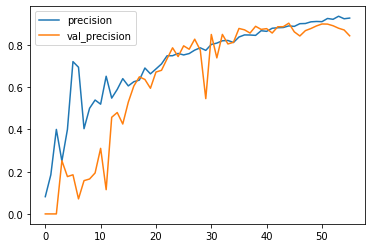

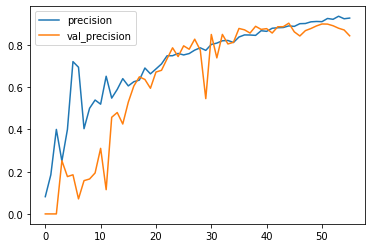

In [ ]:
# Plot val precision vs train precision:
history[['precision','val_precision']].plot()
plt.show()

<AxesSubplot:>

<AxesSubplot:>

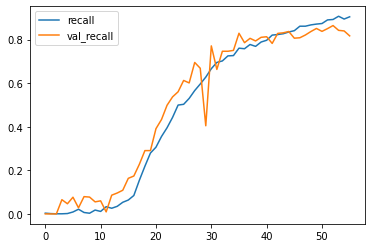

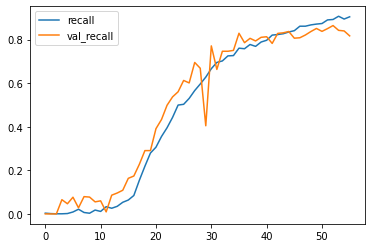

In [ ]:
history[['recall','val_recall']].plot()

In [ ]:
# Slight overfitting ... but 84.5% test recall form only 10% of the training set. Not a bad start...


In [ ]:
label_names = ['airplane',
               'automobile',
               'bird',
               'cat',
               'deer',
               'dog',
               'frog',
               'horse',
               'ship',
               'truck']

In [ ]:
### Reserved for future tests ...

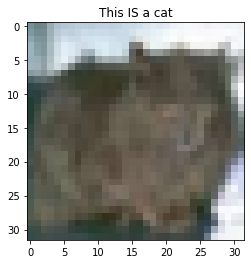

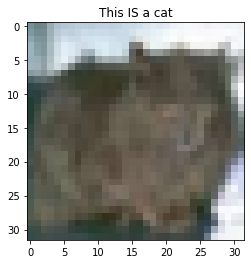

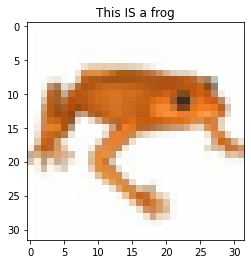

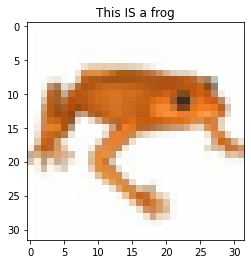

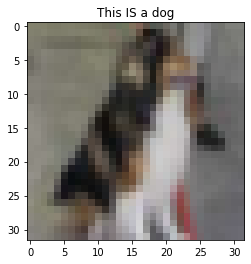

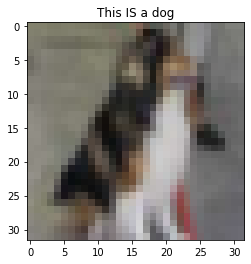

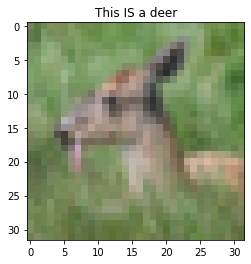

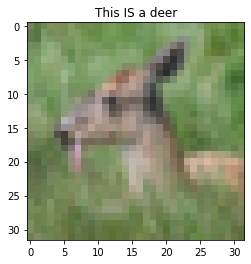

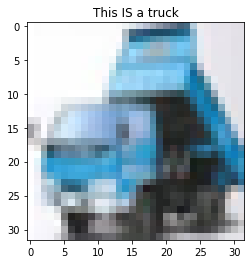

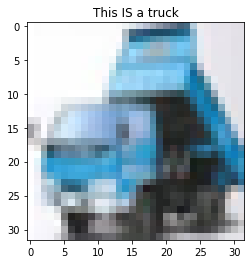

In [ ]:
sanity_check_subset_x = selected_x_train[:5]
sanity_check_subset_y = selected_y_train_ohe[:5]

for i in np.arange(5):
    plt.imshow(sanity_check_subset_x[i])
    plt.title(f"This IS a {label_names[np.argmax(sanity_check_subset_y[i])]}")
    plt.show()

